Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:
airbnbRaw<-read.csv('airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
cols <- c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')
airbnb <- airbnbRaw[,cols]
airbnb$Neighbourhood <- as.factor(airbnb$Neighbourhood)
airbnb |> colnames() |> print()

 [1] "City"                 "Room.Type"            "Neighbourhood"       
 [4] "Accommodates"         "Bathrooms"            "Bedrooms"            
 [7] "Beds"                 "Price"                "Square.Feet"         
[10] "Guests.Included"      "Extra.People"         "Review.Scores.Rating"
[13] "Latitude"             "Longitude"           


Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
cols <- cols[cols != c("City", "Room.Type")]
df_madrid <- airbnb[airbnb$Room.Type == "Entire home/apt" & airbnb$City == 'Madrid', cols]
df_madrid |> head()
df_madrid |> summary()

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
1,,2,1.0,0,1,50,NA,2,15,96,40.40745,-3.707995
2,,4,1.0,1,2,50,NA,2,25,81,40.40832,-3.705006
3,,4,1.5,1,2,77,NA,1,0,89,40.41372,-3.706823
4,Embajadores,2,1.0,1,2,50,NA,1,20,93,40.41126,-3.697305
5,Embajadores,5,1.0,2,4,95,NA,4,0,97,40.41256,-3.701155
6,La Latina,4,1.0,1,2,69,NA,2,18,91,40.40791,-3.705095


     Neighbourhood   Accommodates      Bathrooms        Bedrooms     
            :2302   Min.   : 1.000   Min.   :0.000   Min.   : 0.000  
 Malasaña   : 679   1st Qu.: 3.000   1st Qu.:1.000   1st Qu.: 1.000  
 Embajadores: 585   Median : 4.000   Median :1.000   Median : 1.000  
 La Latina  : 571   Mean   : 4.051   Mean   :1.241   Mean   : 1.463  
 Sol        : 536   3rd Qu.: 5.000   3rd Qu.:1.000   3rd Qu.: 2.000  
 Cortes     : 441   Max.   :16.000   Max.   :6.500   Max.   :10.000  
 (Other)    :2789                    NA's   :14      NA's   :9       
      Beds            Price        Square.Feet     Guests.Included 
 Min.   : 1.000   Min.   : 10.0   Min.   :   0.0   Min.   : 1.000  
 1st Qu.: 1.000   1st Qu.: 55.0   1st Qu.:   0.0   1st Qu.: 1.000  
 Median : 2.000   Median : 71.0   Median : 291.0   Median : 2.000  
 Mean   : 2.374   Mean   : 87.3   Mean   : 401.5   Mean   : 1.903  
 3rd Qu.: 3.000   3rd Qu.: 99.0   3rd Qu.: 646.0   3rd Qu.: 2.000  
 Max.   :16.000   Max.   :875.0 

Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.

In [4]:
df_madrid$Square.Meters <- df_madrid$Square.Feet * 0.092903
df_madrid[,c("Square.Feet", "Square.Meters")] |> na.omit() |> head()

,Square.Feet,Square.Meters
,<int>,<dbl>
51,592,54.99858
148,538,49.98181
211,753,69.95596
224,323,30.00767
256,1184,109.99715
263,0,0.00000


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [5]:
nrows_with_na <- df_madrid[df_madrid$Square.Meters |> is.na(), ] |> nrow()
nrows <- df_madrid[df_madrid$Square.Meters, ] |> nrow()
paste("El pocentaje de apartamentos que no muestran los metros cuadrados es: ", 100 * nrows_with_na/nrows) |> print()
paste("El número de apartamentos que no muestran los metros cuadrados es: ", nrows_with_na) |> print()

[1] "El pocentaje de apartamentos que no muestran los metros cuadrados es:  97.0796346327029"
[1] "El número de apartamentos que no muestran los metros cuadrados es:  7546"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
nrows_without_na <- df_madrid$Square.Meters |> na.omit() |> length()
nrows_is_zero <- df_madrid[df_madrid$Square.Meters == 0, ]$Square.Meters |> na.omit() |> length()
paste("El pocentaje de apartamentos con valor 0 metros cuadrados es: ", 100 * nrows_is_zero/nrows_without_na) |> print()
paste("El número de apartamentos con valor 0 metros cuadrados es: ", nrows_is_zero) |> print()

[1] "El pocentaje de apartamentos con valor 0 metros cuadrados es:  36.4145658263305"
[1] "El número de apartamentos con valor 0 metros cuadrados es:  130"


Reemplazar todos los 0m^2 por NA 

In [7]:
df_madrid[!is.na(df_madrid$Square.Meters) & df_madrid$Square.Meters == 0, ]$Square.Meters <- NA
table(factor(df_madrid$Square.Meters))


  2.043866   2.322575    2.78709   2.972896   3.251605    3.71612   3.994829 
         1          2          1          1          2          6          1 
  4.180635    4.64515   5.109665    5.57418    6.50321   6.596113   6.967725 
         3          2          6          1          1          1          2 
   7.43224   7.896755    8.36127     9.2903  10.033524  13.099323  18.023182 
         1          3          2          1          2          1          1 
 19.045115  19.974145  22.018011  24.990907  27.034773  27.963803  30.007669 
         1          3          1          2          1          1          8 
 31.958632  35.024431  36.046364  36.975394  37.997327   39.01926  40.041193 
         2          5          1          3          3          1         10 
 41.992156  44.036022  44.965052  49.981814  51.003747   52.02568  54.998576 
         1          1         15         12          1          1          7 
 56.020509  57.971472  60.015338   60.38695    65.0321  68.0049

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer:
* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.
* crearemos una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más

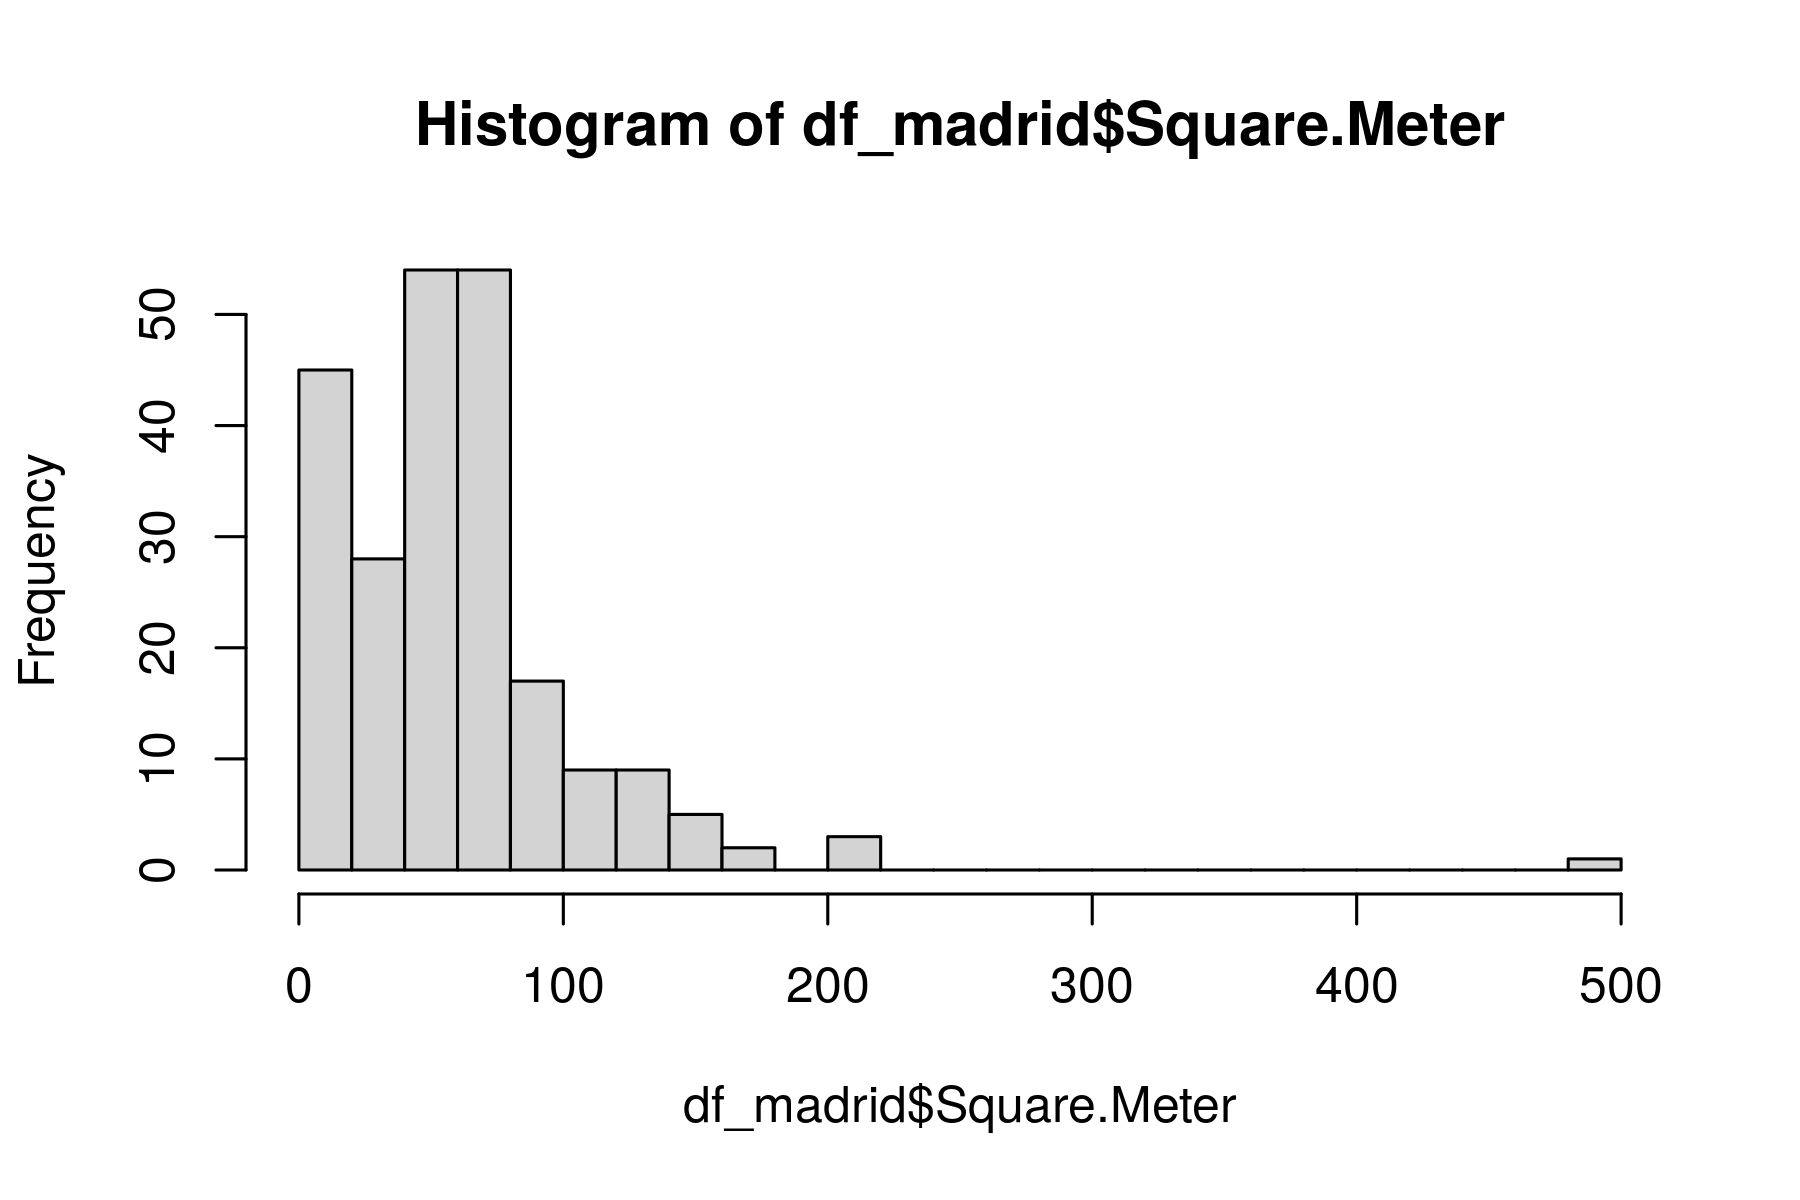

In [8]:
hist(df_madrid$Square.Meter, breaks = 25)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

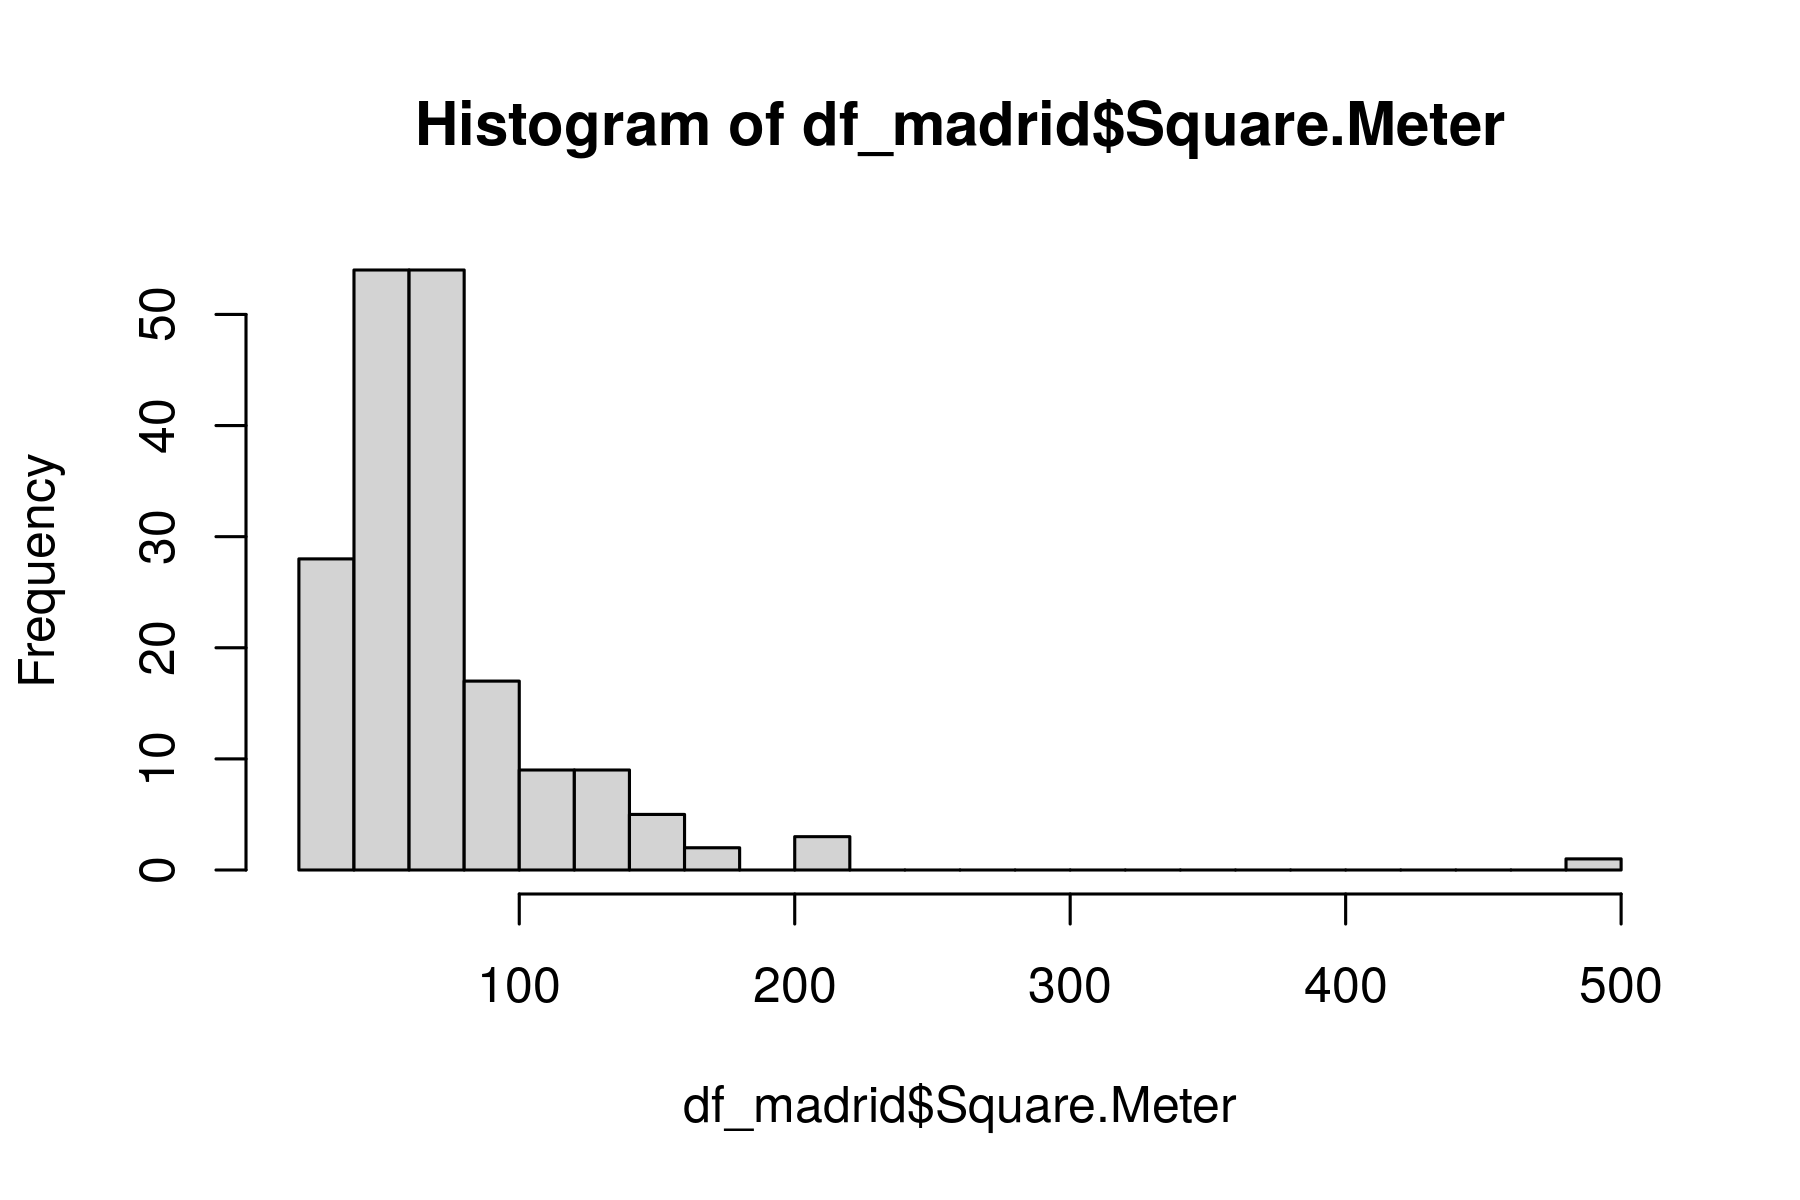

In [9]:
df_madrid[!is.na(df_madrid$Square.Meters) & df_madrid$Square.Meters < 20, ]$Square.Meters <- NA
hist(df_madrid$Square.Meter, breaks = 25)

Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.

In [10]:
# Con librería dplyr
library(dplyr)
# Agrupo por barrio y cuento valores (no NA)
tibble_madrid <- df_madrid |> group_by(Neighbourhood) |> summarise(sum(!is.na(Square.Meters)))
# paso los barrios con valores a vector
barrios <- tibble_madrid[tibble_madrid[2] > 0, ][1] |> pull()
barrios = barrios[barrios != ""]
paste(length(barrios), "barrios con valores de",
length(levels(factor(df_madrid$Neighbourhood)))) |> print()

df_madrid <- df_madrid[df_madrid$Neighbourhood %in% barrios, ]


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] "38 barrios con valores de 66"


In [11]:
# Otra forma

# nbh_with_values <- c()
# for (barrio in levels(factor(df_madrid$Neighbourhood))) {
#     if (length(na.omit(df_madrid[df_madrid$Neighbourhood == barrio, "Square.Meters"])) > 0) {
#         nbh_with_values <- append(nbh_with_values, barrio)
#     }
# }
# paste(length(nbh_with_values), "barrios con valores de",
# length(levels(factor(df_madrid$Neighbourhood)))) |> print()
# 
# df_madrid <- df_madrid[df_madrid$Neighbourhood %in% nbh_with_values, ]

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

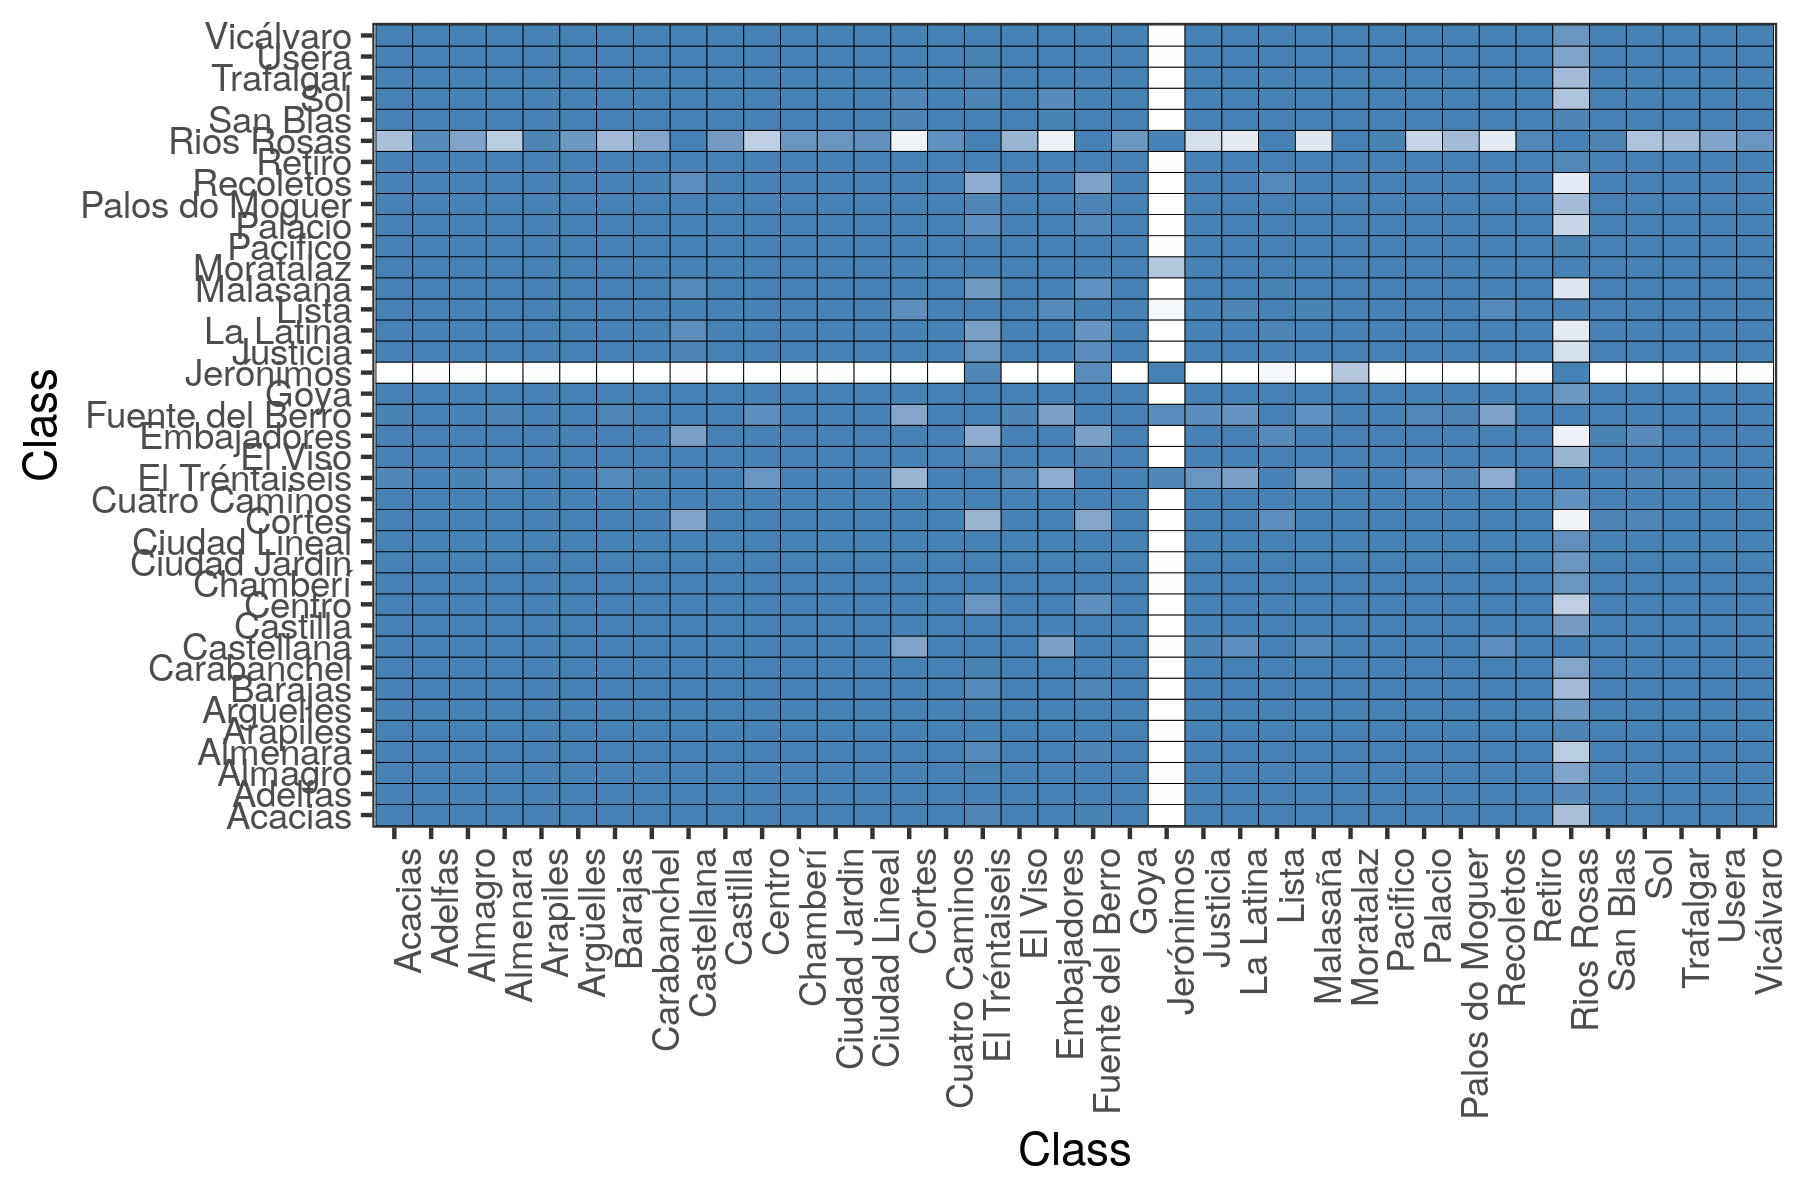

In [12]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


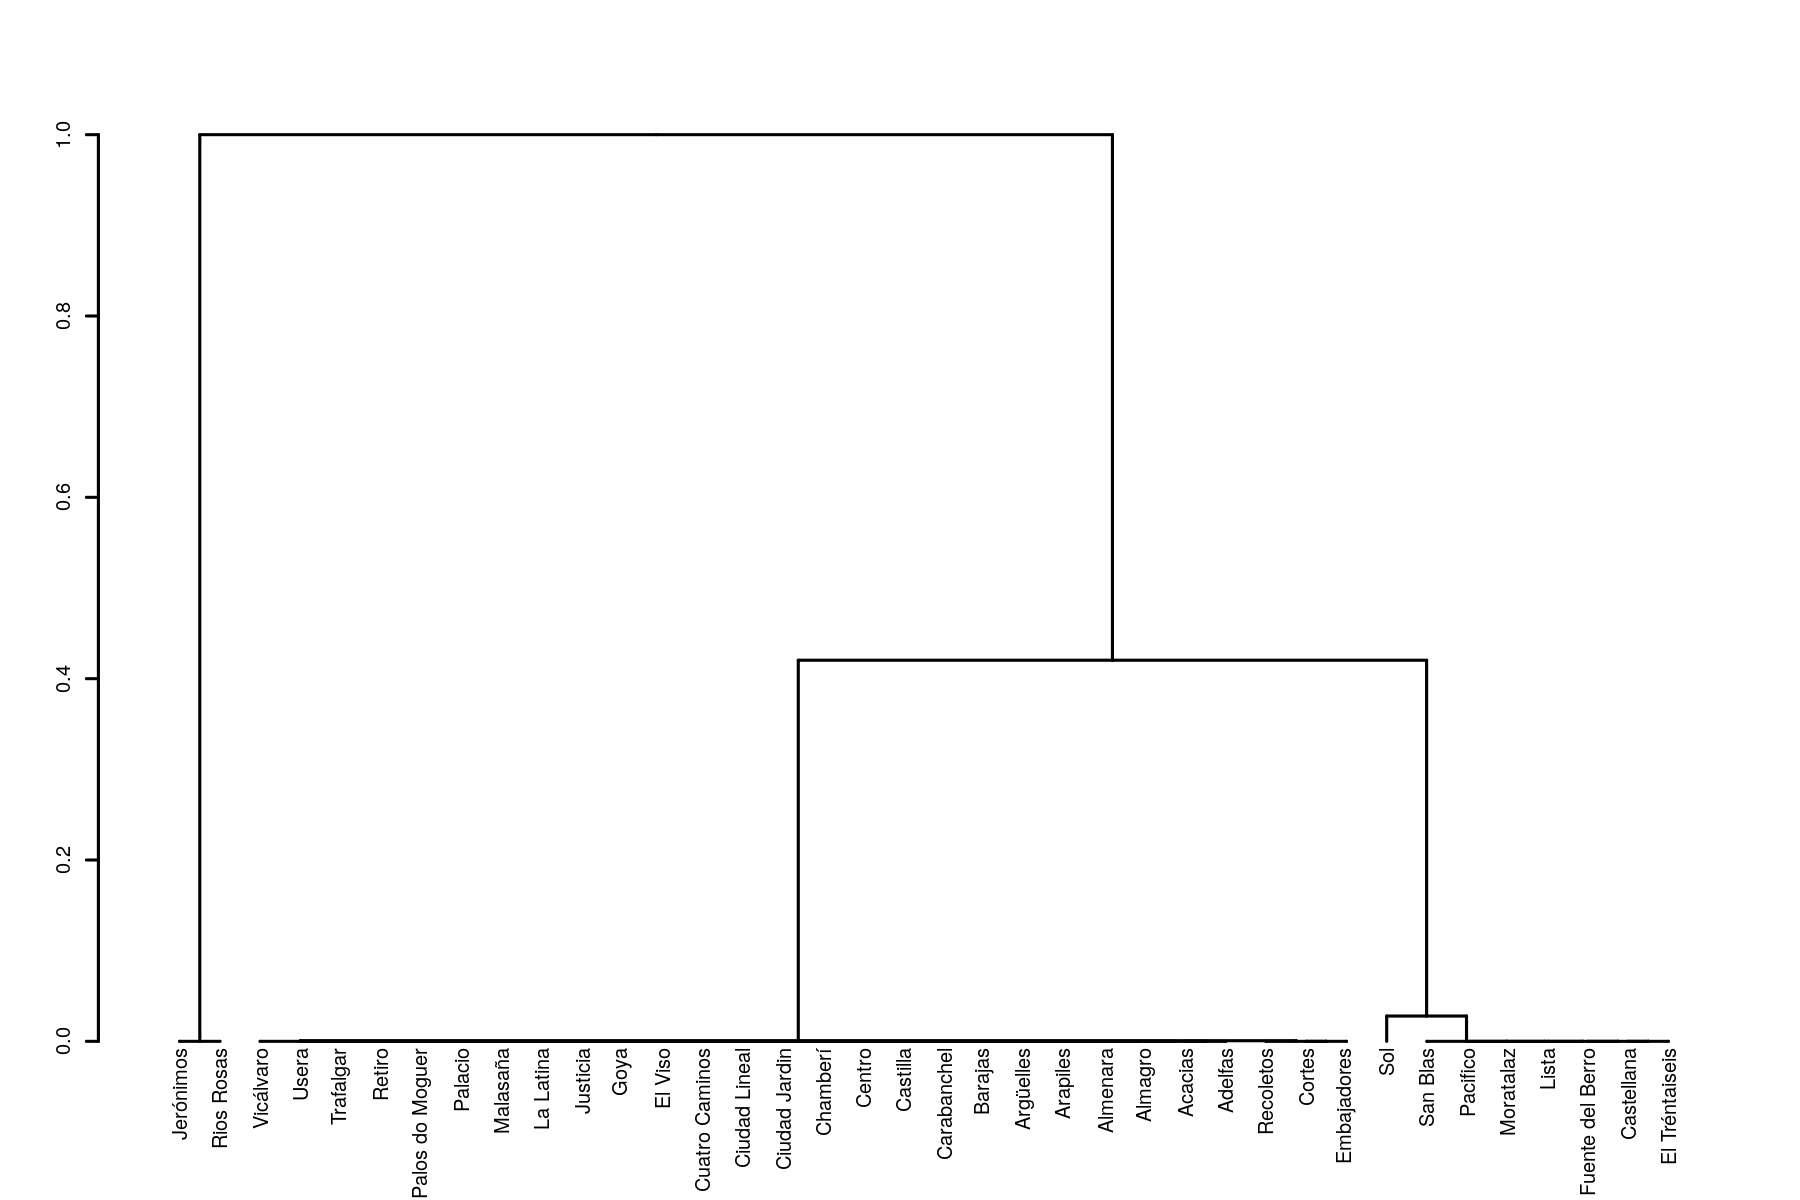

In [13]:
tukey.dist <- as.dist(1-resm)
tukey.tree <- hclust(tukey.dist, method="complete")
tukey.dend <- as.dendrogram(tukey.tree)
par(cex=0.4)
plot(tukey.dend)

¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?


---------------------
Welcome to dendextend version 1.15.1
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




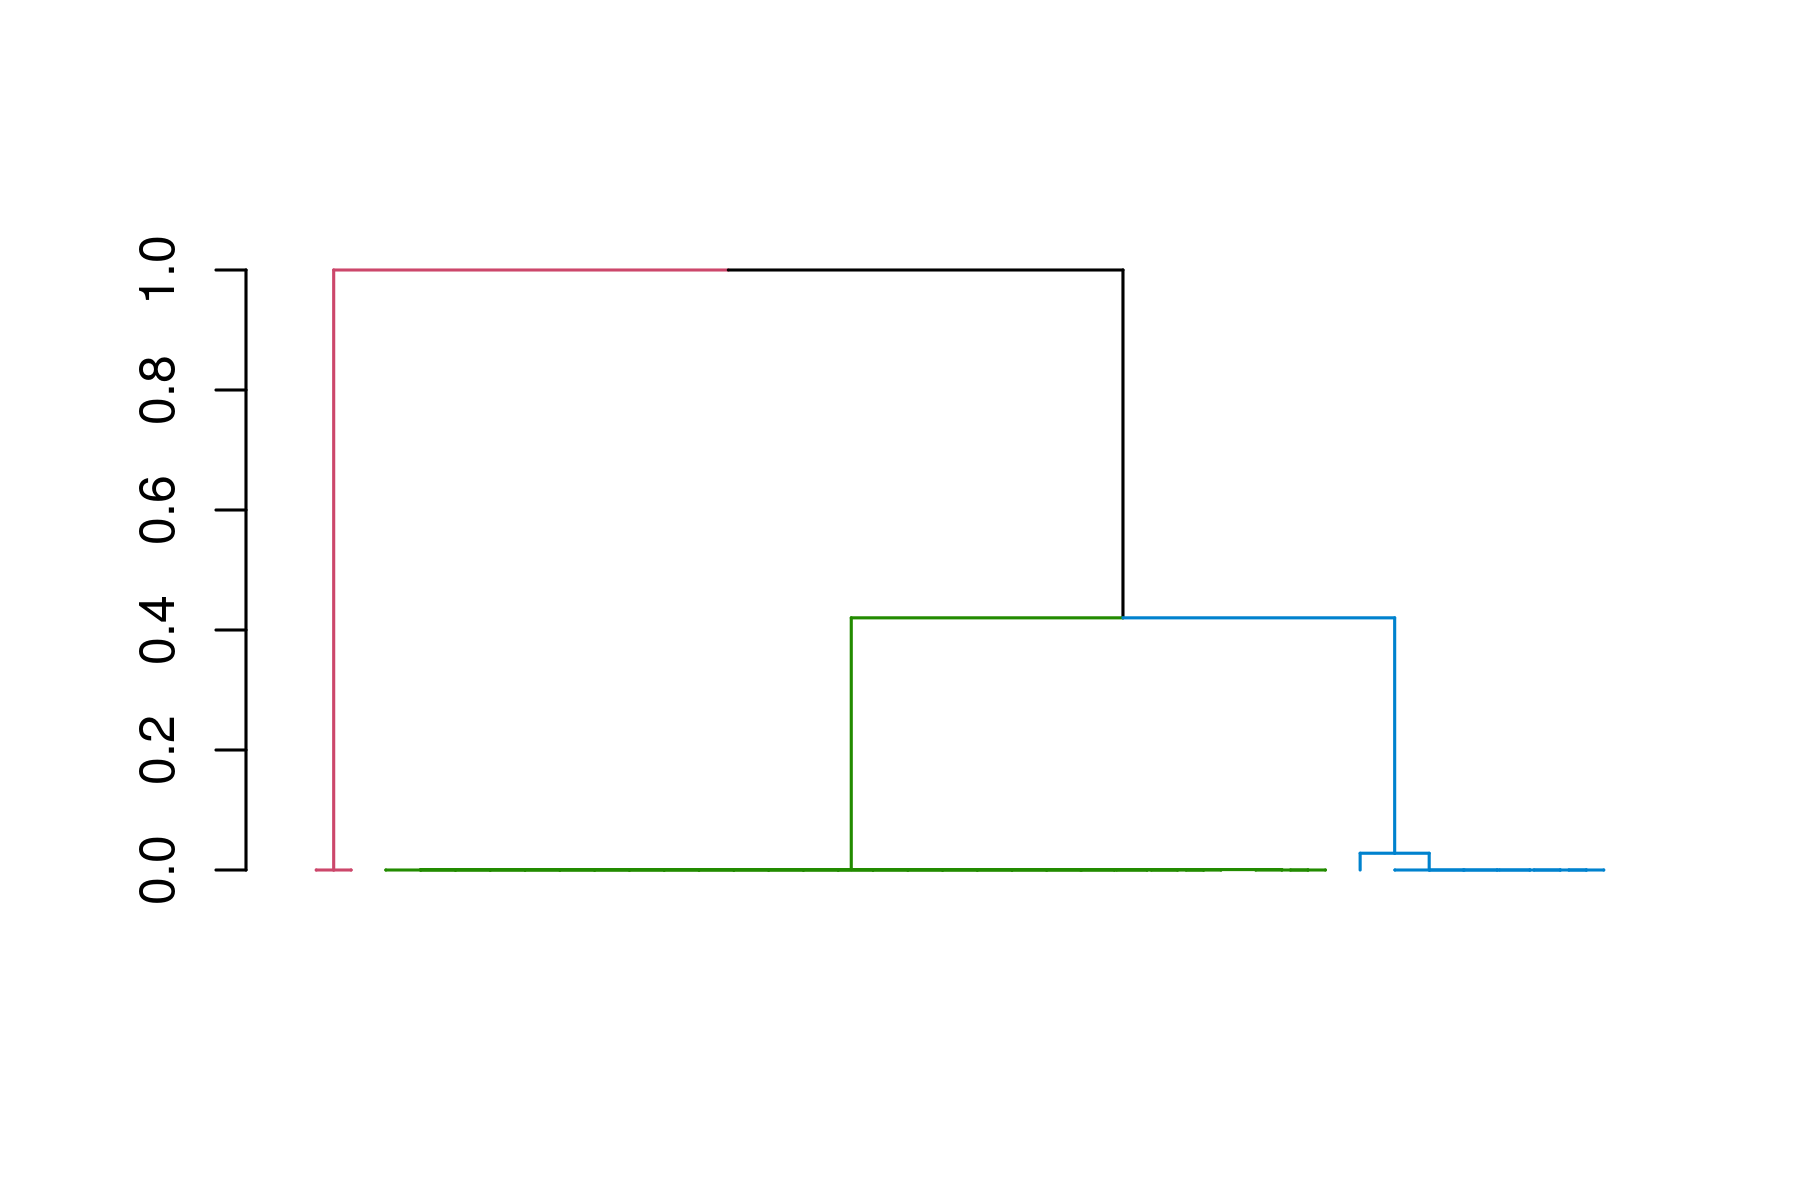

In [14]:
# Viendo el arbol, parece que el corte en 0.2 es bastante estable, nos daría 3 clusters
library(dendextend)

clusters <- cutree(tukey.dend, k=3)
plot(color_branches(tukey.dend, k=3), leaflab="none")

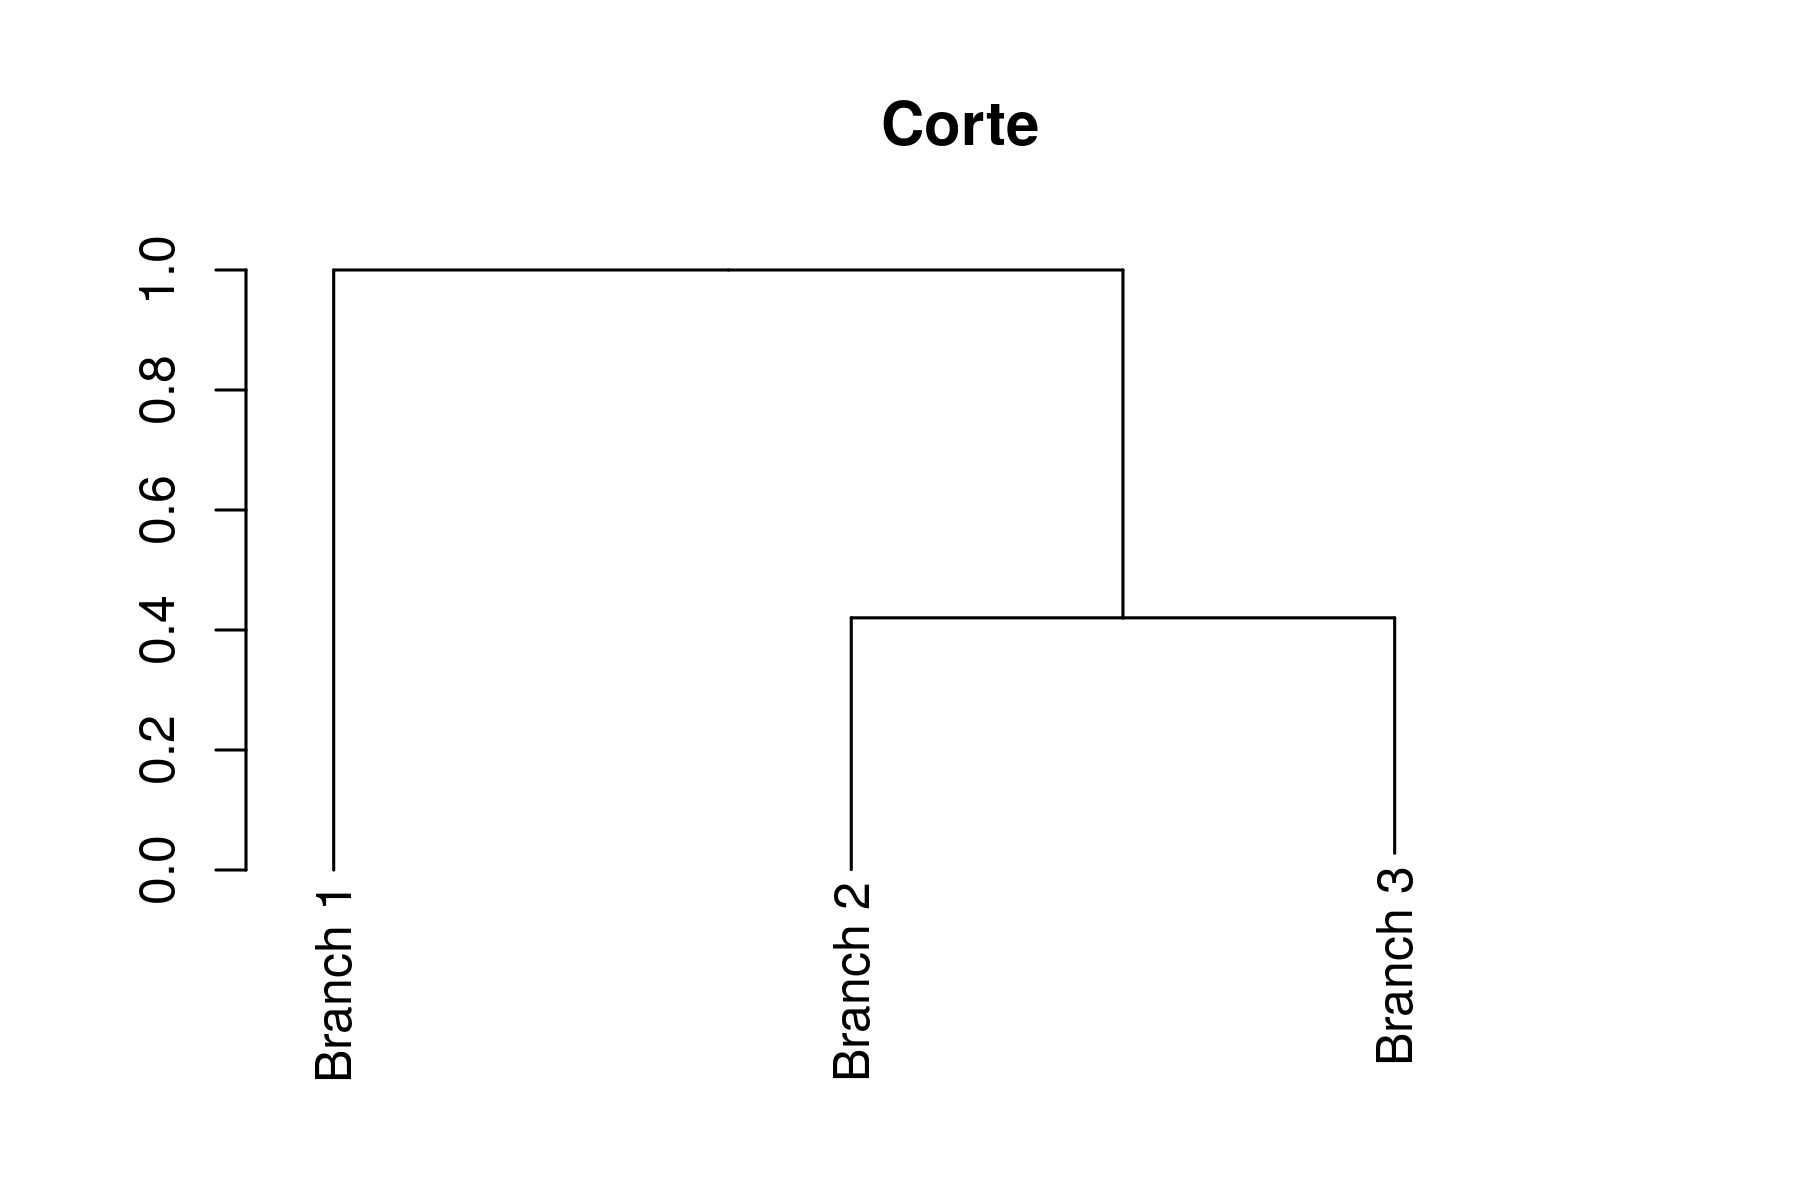

In [15]:
plot(cut(tukey.dend, h = 0.2)$upper, main = "Corte", cex=1)

In [16]:
table(barrios, cutree(tukey.tree, h=0.2))

                                     
barrios                               1 2 3
                                      0 0 0
  Acacias                             1 0 0
  Acton                               0 0 0
  Adams Morgan                        0 0 0
  Adelfas                             1 0 0
  Agios Nikolaos                      0 0 0
  Albert Park                         0 0 0
  Alésia                              0 0 0
  Almagro                             1 0 0
  Almenara                            1 0 0
  Alt-Treptow                         0 0 0
  Aluche                              0 0 0
  Arapiles                            1 0 0
  Arganzuela                          0 0 0
  Argüelles                           1 0 0
  Astoria                             0 0 0
  Atocha                              0 0 0
  Aurelio                             0 0 0
  Auteuil                             0 0 0
  Balham                              0 0 0
  Ballard                             

Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [17]:
 df_madrid['neighb_id'] = 0
 for (i in 1:3) {
     df_madrid[df_madrid$Neighbourhood %in% names(clusters[clusters == i]), ]['neighb_id'] <- i
 }
 df_madrid |> head()

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
4,Embajadores,2,1,1,2,50,NA,1,20,93,40.41126,-3.697305,NA,1
5,Embajadores,5,1,2,4,95,NA,4,0,97,40.41256,-3.701155,NA,1
6,La Latina,4,1,1,2,69,NA,2,18,91,40.40791,-3.705095,NA,1
9,Embajadores,4,1,1,2,57,NA,2,8,98,40.41162,-3.703281,NA,1
10,La Latina,2,1,1,1,59,NA,1,0,95,40.40734,-3.707019,NA,1
15,La Latina,14,2,3,14,120,NA,2,18,92,40.40908,-3.704744,NA,1


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [18]:
set.seed(12122)

In [19]:
# Quitamos Neighbourhood dado que da error por el elevado número de coeficientes (supongo), y Sqare.Feet por ser linealmente dependiente de Square.
df_fix <- df_madrid[, !names(df_madrid) %in% c("Neighbourhood", "Square.Feet")]
# Dividimos en train - test
idx <- sample(1:nrow(df_fix),nrow(df_fix)*0.7)
df_madrid.train <- df_fix[idx,]
df_madrid.test <-df_fix[-idx,]


In [20]:
paste("Número de muestras de train:", nrow(df_madrid.train)) |> print()
paste("Número de muestras de test:", nrow(df_madrid.test)) |> print()

[1] "Número de muestras de train: 3430"
[1] "Número de muestras de test: 1471"


In [21]:
# Creamos nuestro modelo
model <- lm(Square.Meters ~ ., data = df_madrid.train)
summary(model)


Call:
lm(formula = Square.Meters ~ ., data = df_madrid.train)

Residuals:
    Min      1Q  Median      3Q     Max 
-60.264 -10.299  -1.424  11.843  96.491 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           631.43534 6944.16006   0.091  0.92772    
Accommodates            5.36853    2.49327   2.153  0.03355 *  
Bathrooms              44.83230    5.97256   7.506 1.91e-11 ***
Bedrooms                8.91570    3.86308   2.308  0.02293 *  
Beds                   -0.06518    2.74900  -0.024  0.98113    
Price                   0.15102    0.05287   2.857  0.00515 ** 
Guests.Included        -5.82556    2.34687  -2.482  0.01461 *  
Extra.People            0.25198    0.24325   1.036  0.30259    
Review.Scores.Rating    0.39079    0.33238   1.176  0.24230    
Latitude              -16.08863  164.66928  -0.098  0.92235    
Longitude              14.94146  141.80647   0.105  0.91628    
neighb_id              10.03643    5.28093   1.901  0.06006 

In [22]:
# Analizando, parece que podemos hacer mas simple el modelo (y mejorar el R-Squared) sin perder mucho detalle quitando Beds, Latitude y Longitude
model <- lm(Square.Meters ~ 
            Accommodates + 
            Bathrooms +
            Bedrooms +
            Price +
            Guests.Included +
            Extra.People +
            Review.Scores.Rating +
            neighb_id, data = df_madrid.train)

summary(model)


Call:
lm(formula = Square.Meters ~ Accommodates + Bathrooms + Bedrooms + 
    Price + Guests.Included + Extra.People + Review.Scores.Rating + 
    neighb_id, data = df_madrid.train)

Residuals:
   Min     1Q Median     3Q    Max 
-60.09 -10.30  -1.02  11.71  96.68 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -75.23827   29.21346  -2.575  0.01134 *  
Accommodates           5.31371    1.90725   2.786  0.00629 ** 
Bathrooms             44.74737    5.63046   7.947  1.8e-12 ***
Bedrooms               8.97822    3.64950   2.460  0.01544 *  
Price                  0.14944    0.04757   3.141  0.00216 ** 
Guests.Included       -5.78714    2.22916  -2.596  0.01072 *  
Extra.People           0.25083    0.23690   1.059  0.29200    
Review.Scores.Rating   0.40196    0.31406   1.280  0.20327    
neighb_id             10.21939    4.94016   2.069  0.04092 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard er

In [23]:
# Efectivamente mejoramos el "Adjusted R-squared" un poco y vemos que baja el "Residual standard error"

Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [24]:
# Para medir la calidad de nuestro modelo, vamos a quitar los valores NA de las variables 
# dependiente de nuestro modelo y poder obtener así medidas
cols = names(model$model[-1])
df_fix = na.omit(df_madrid, col = cols)

idx <- sample(1:nrow(df_fix),nrow(df_fix)*0.7)
df_madrid.train <- df_fix[idx,]
df_madrid.test <-df_fix[-idx,]

paste("Número de muestras de train:", nrow(df_madrid.train)) |> print()
paste("Número de muestras de test:", nrow(df_madrid.test)) |> print()

[1] "Número de muestras de train: 115"
[1] "Número de muestras de test: 50"


In [25]:
df_madrid.test$Square.Meters_est<-predict(model, df_madrid.test)

RMSE   Rsquared        MAE 
31.4697615  0.6777166 19.7235804

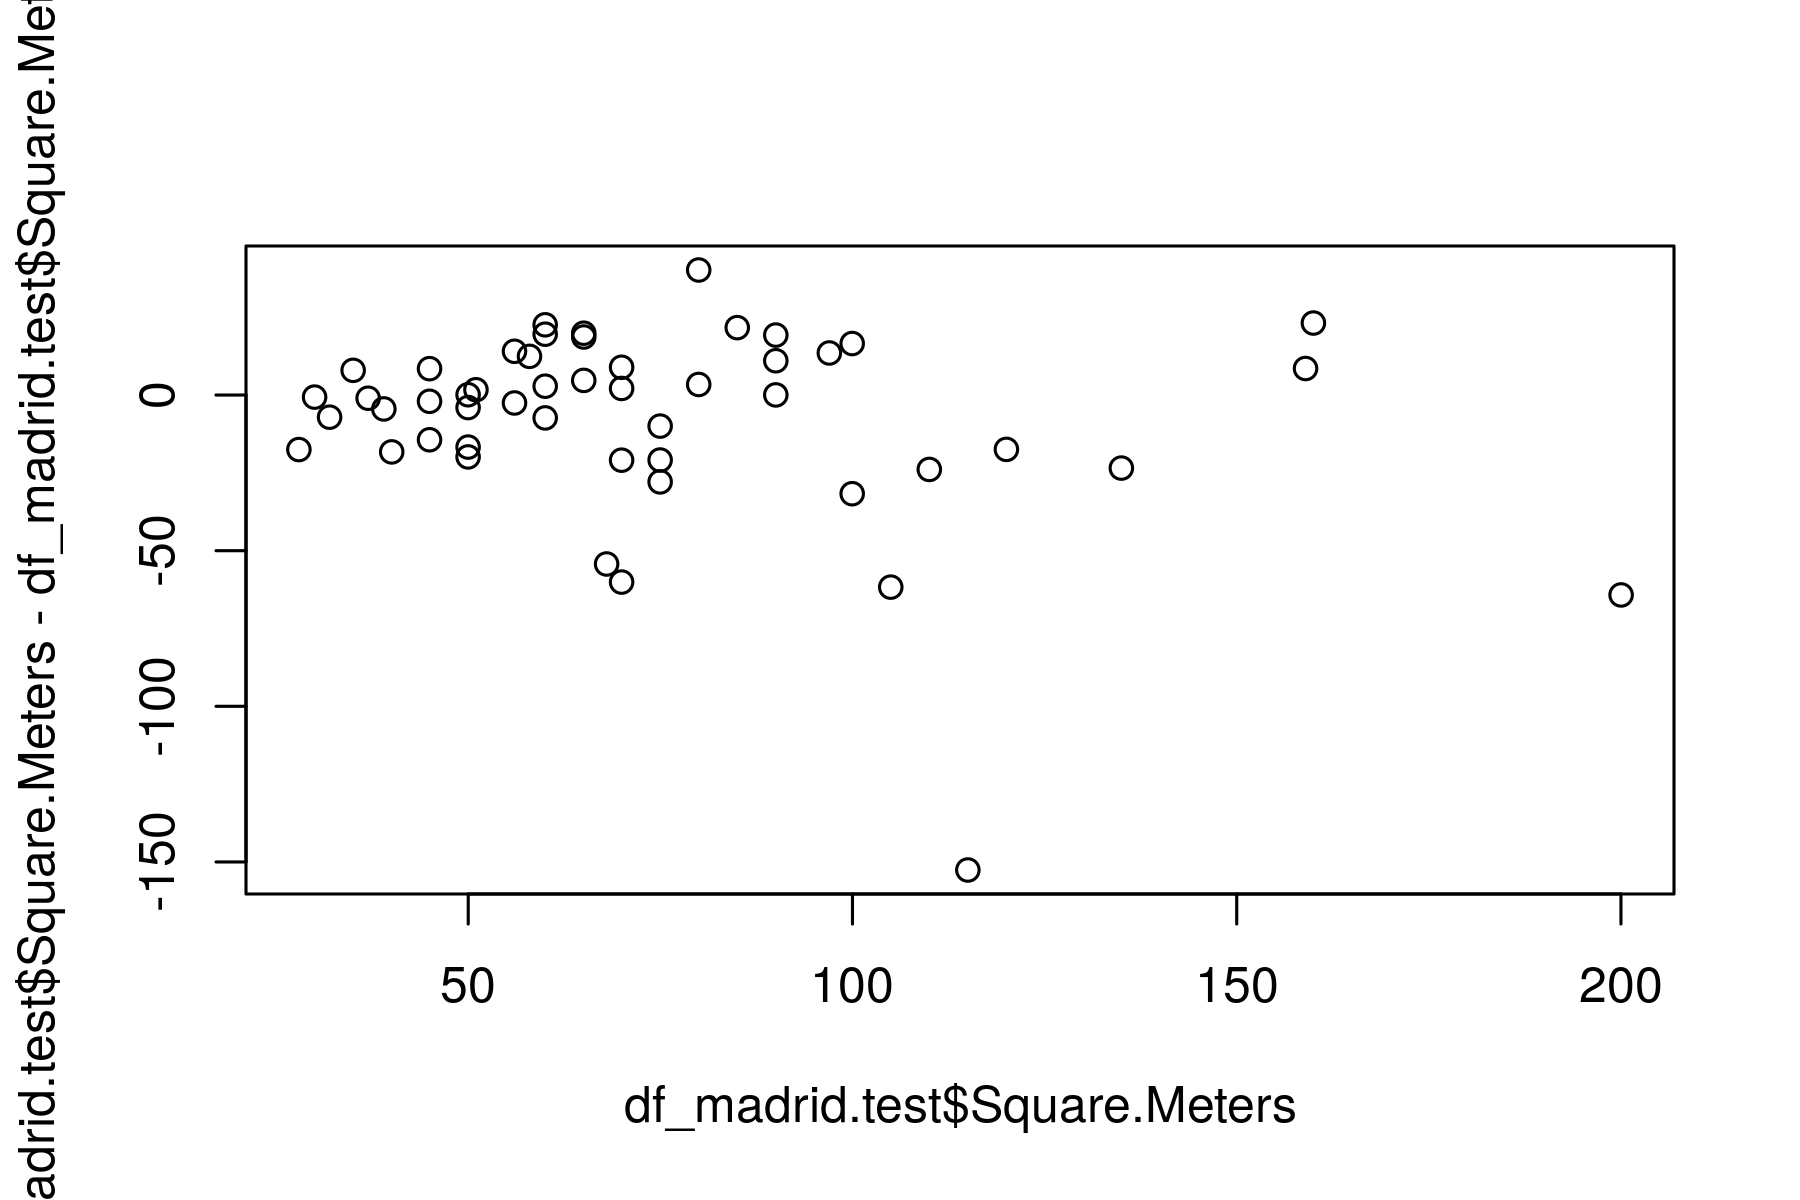

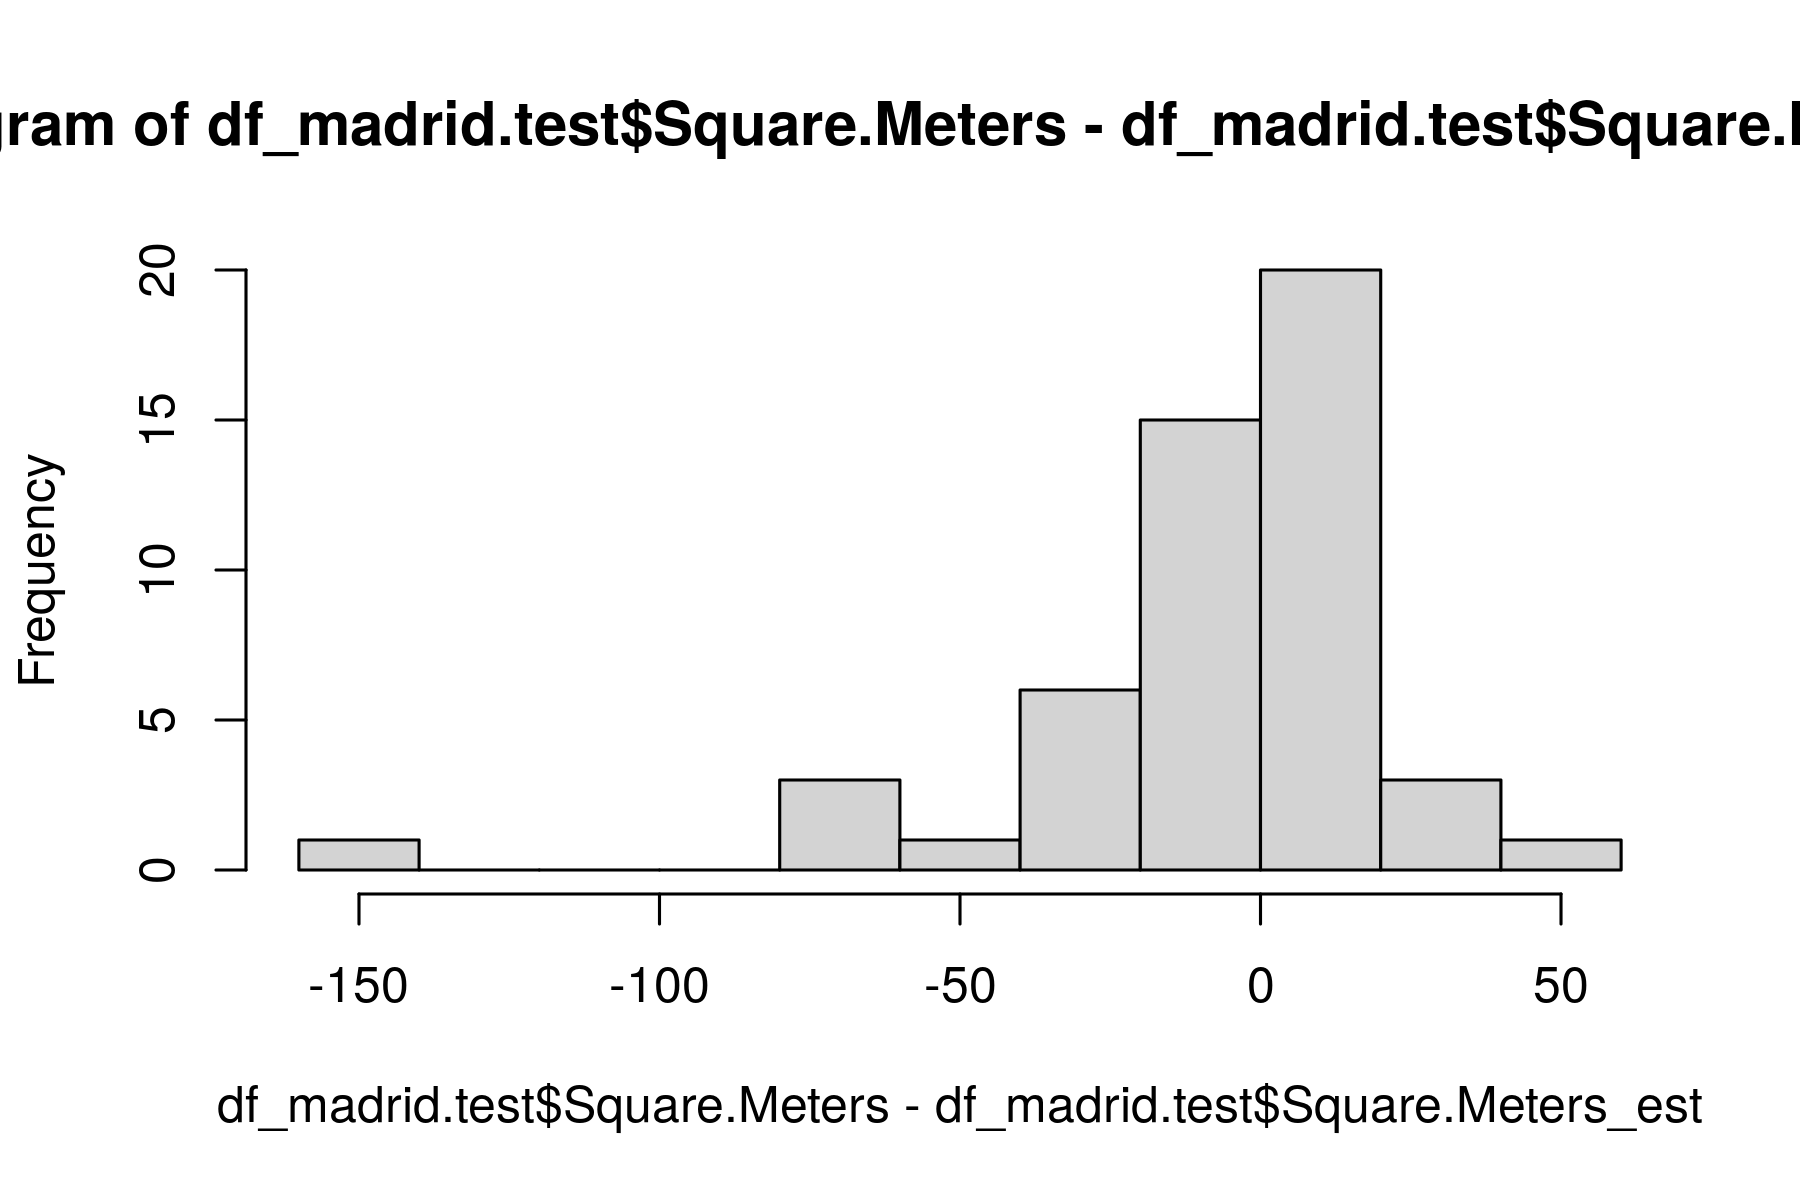

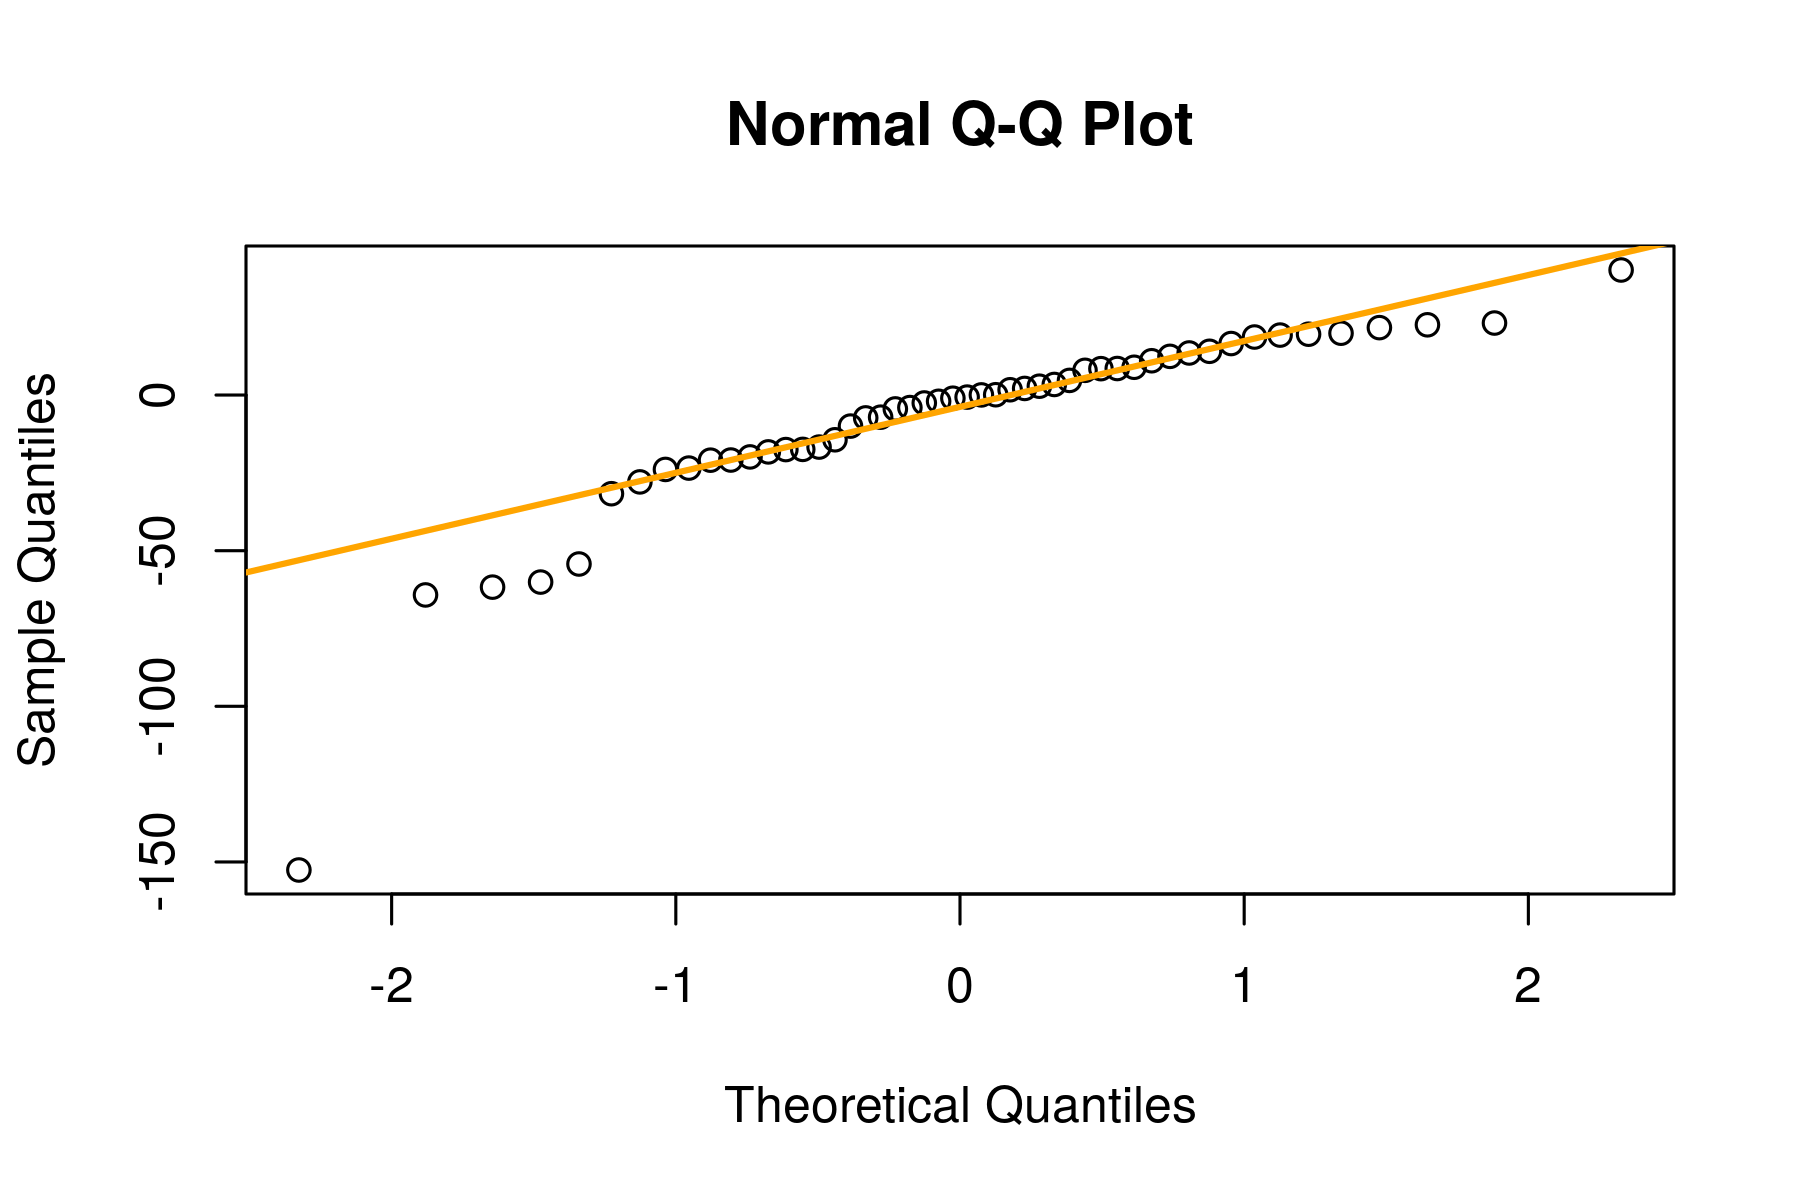

In [26]:
plot(df_madrid.test$Square.Meters,(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est))

caret::postResample(pred=df_madrid.test$Square.Meters_est, obs= df_madrid.test$Square.Meters)

hist(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est,10)
qqnorm(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est)
qqline(df_madrid.test$Square.Meters-df_madrid.test$Square.Meters_est, col = 'orange', lwd =2)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80.
¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset.
¿Como varía sus metros cuadrados con cada habitación adicional?

In [27]:
# El modelo no tiene la variable Neighbourhood, pero si neighb_id, así que asignamos el correspondiente con Sol
df_anuncio  = data.frame('Accommodates'= 6,
                        'Bathrooms'= 1,
                        'Bedrooms'= 3,
                        #'Beds'= 3, No se incluye en el modelo
                        'Price'= 80,
                        'Guests.Included'= df_madrid[df_madrid$Neighbourhood == 'Sol', ]$Guests.Included |> mean(na.rm = TRUE),
                        'Extra.People'= df_madrid[df_madrid$Neighbourhood == 'Sol', ]$Extra.People |> mean(na.rm = TRUE),
                        'Review.Scores.Rating'= 80,
                        #'Latitude'= df_madrid[df_madrid$Neighbourhood == 'Sol', ]$Latitude |> mean(na.rm = TRUE), No se incluye en el modelo
                        #'Longitude'= df_madrid[df_madrid$Neighbourhood == 'Sol', ]$Longitude |> mean(na.rm = TRUE), No se incluye en el modelo
                        'neighb_id'= df_madrid[df_madrid$Neighbourhood == 'Sol', ]$neighb_id[1])
df_anuncio

Accommodates,Bathrooms,Bedrooms,Price,Guests.Included,Extra.People,Review.Scores.Rating,neighb_id
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,1,3,80,2.18097,10.88246,80,2


In [28]:
df_anuncio$Square.Meters_est <- predict(model, df_anuncio)
paste("Nuestro modelo predice que  tendría:", df_anuncio$Square.Meters_est, "m^2" ) |> print()

[1] "Nuestro modelo predice que  tendría: 82.9849264721187 m^2"


In [29]:
paste("Por cada habitación adicional, según nuestro modelo, añadaría: ", 
      summary(model)$coefficients['Bedrooms', 'Estimate'], 
      "m^2 adicionales" ) |> print()

[1] "Por cada habitación adicional, según nuestro modelo, añadaría:  8.97822291943422 m^2 adicionales"


Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [30]:
df_madrid[df_madrid$Square.Meters |> is.na(), ]$Square.Meters = predict(model, df_madrid[df_madrid$Square.Meters |> is.na(), ], na.action=na.pass)
df_madrid[df_madrid$Square.Meters |> is.na(), ] |> head()

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
23,La Latina,4,1,1,1,100,NA,2,12,NA,40.40990,-3.710948,NA,1
45,La Latina,3,1,1,2,55,NA,2,8,NA,40.40893,-3.704979,NA,1
72,Embajadores,10,1,3,5,245,NA,1,0,NA,40.41187,-3.701309,NA,1
123,Sol,4,1,0,1,95,NA,2,20,NA,40.41967,-3.701624,NA,2
173,Pacifico,3,1,1,2,49,NA,1,10,NA,40.40298,-3.676513,NA,2
185,Cortes,2,1,1,1,45,NA,2,25,NA,40.41298,-3.699494,NA,1


In [31]:
print(paste("nrows Madrid:",nrow(df_madrid)))
print(paste("nrows Square.Meters == NA", nrow(df_madrid[df_madrid$Square.Meters |> is.na(), ])))

[1] "nrows Madrid: 4901"
[1] "nrows Square.Meters == NA 702"


In [32]:
# Sigue habiendo valores NA debido a que existen valores NA en otras variables, 
# una opción podria ser modificar dichas variables mediante otros modelos
# pero no creo que sea el objetivo a realizar así que vamos a ignorarlo

Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [33]:
cols = c('Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 'Latitude', 'Longitude', 'Square.Meters')

In [34]:
M <- matrix(c(df_madrid$Accommodates |> na.omit(),
             df_madrid$Bathrooms |> na.omit(),
             df_madrid$Bedrooms |> na.omit(),
             df_madrid$Beds |> na.omit(),
             df_madrid$Price |> na.omit(),
             df_madrid$Guests.Included |> na.omit(),
             df_madrid$Extra.People |> na.omit(),
             df_madrid$Review.Scores.Rating |> na.omit(),
             df_madrid$Latitude |> na.omit(),
             df_madrid$Longitude |> na.omit(),
             df_madrid$Square.Meters |> na.omit()),ncol=length(cols))
colnames (M) = cols

Warning message in matrix(c(na.omit(df_madrid$Accommodates), na.omit(df_madrid$Bathrooms), :
“data length [52483] is not a sub-multiple or multiple of the number of rows [4772]”


In [35]:
prdfmadrid <- prcomp(df_madrid[,cols] |> na.omit() ,center = TRUE, scale. = TRUE)

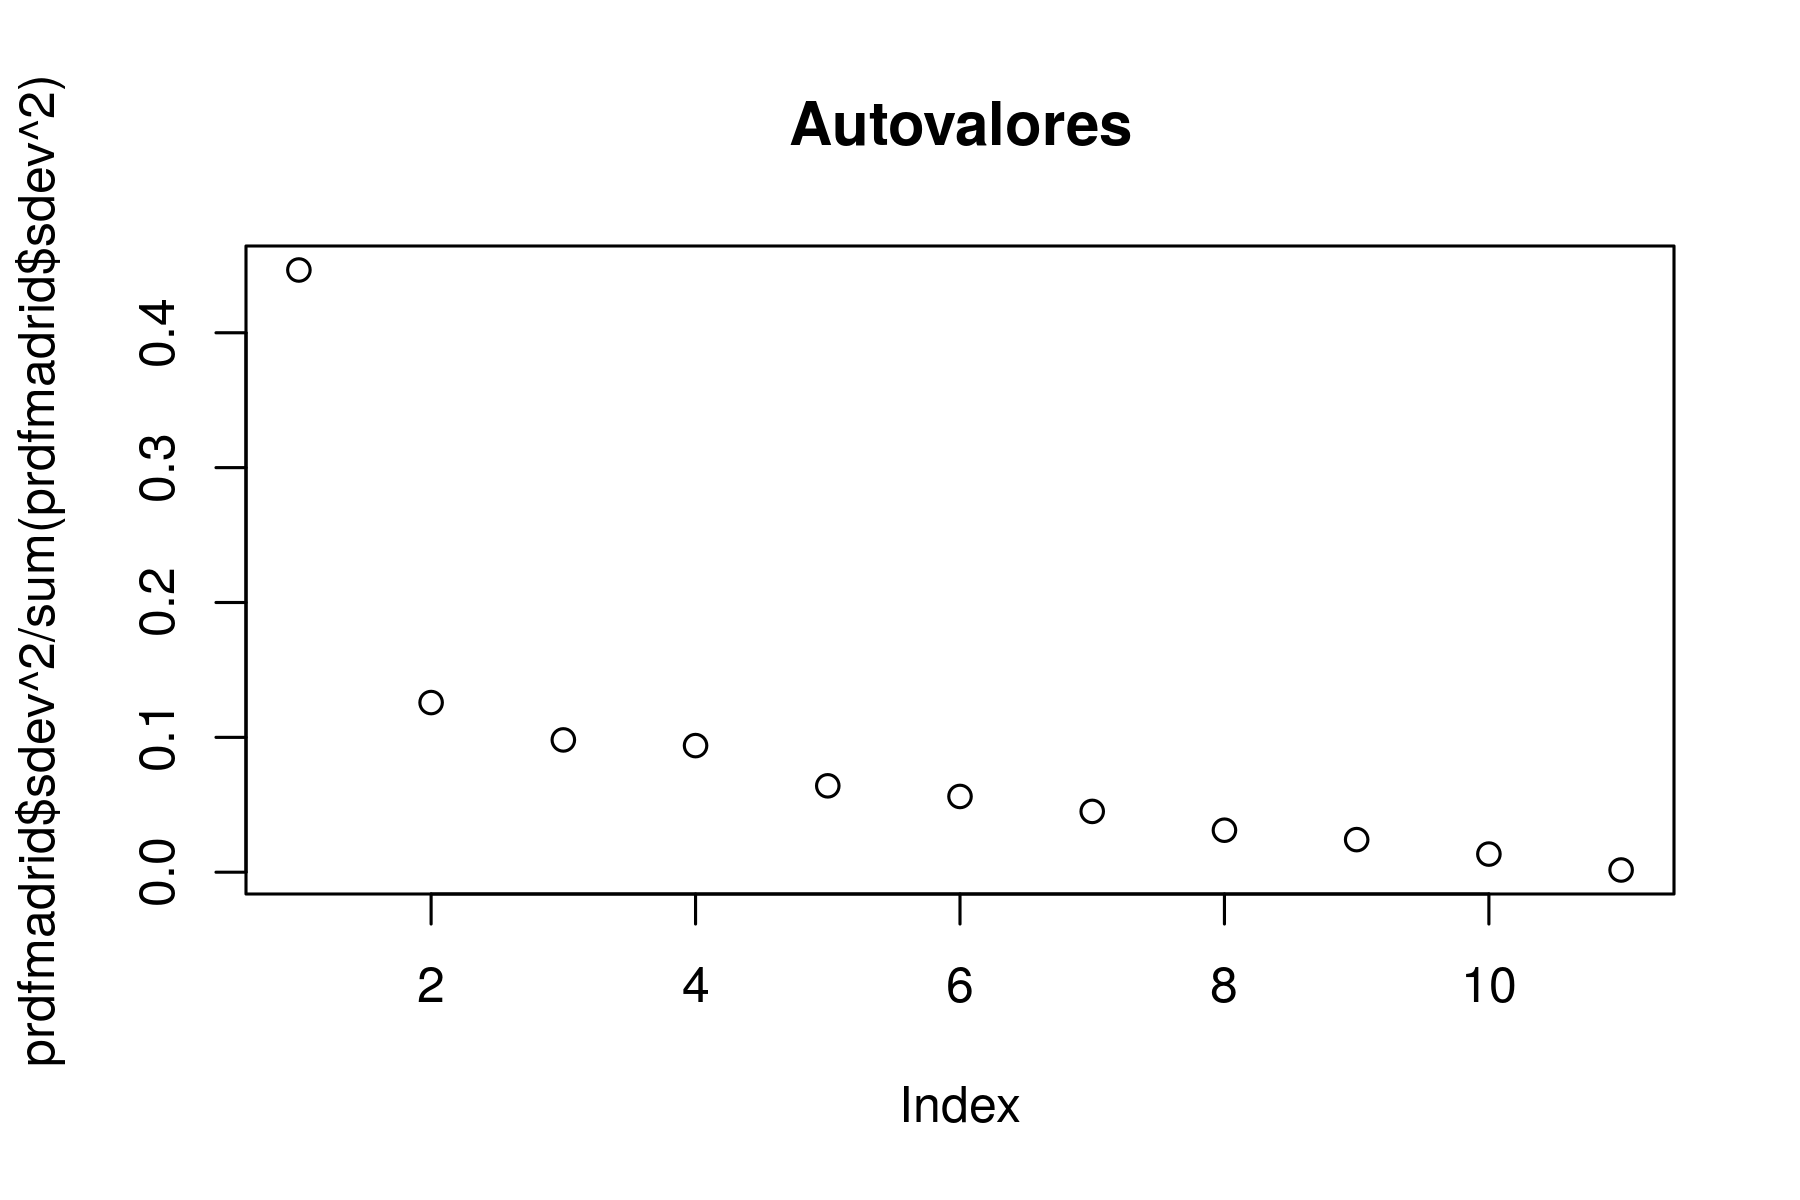

In [36]:
plot(prdfmadrid$sdev^2/sum(prdfmadrid$sdev^2), main="Autovalores")

Standard deviations (1, .., p=11):
 [1] 2.2163474 1.1763301 1.0387994 1.0162142 0.8393723 0.7860126 0.7041872
 [8] 0.5851996 0.5154949 0.3845294 0.1340091

Rotation (n x k) = (11 x 11):
                            PC1          PC2          PC3         PC4
Accommodates         0.40100963  0.069705021  0.075041861 -0.16417777
Bathrooms            0.37054024 -0.077898323 -0.238619907  0.08145182
Bedrooms             0.38869263 -0.008029701 -0.072888463 -0.09014667
Beds                 0.38276783  0.045866590  0.002778362 -0.15010676
Price                0.35275016 -0.033071417 -0.202151069  0.08382406
Guests.Included      0.28210372  0.109581361  0.471337698 -0.05499627
Extra.People         0.13812804  0.143490866  0.762829772  0.17522172
Review.Scores.Rating 0.04290506  0.103918950 -0.065144197  0.93496790
Latitude             0.01891305 -0.692384241  0.132715110  0.03641554
Longitude            0.03785702 -0.679075426  0.151076450  0.08782335
Square.Meters        0.42139268 -0.043300105

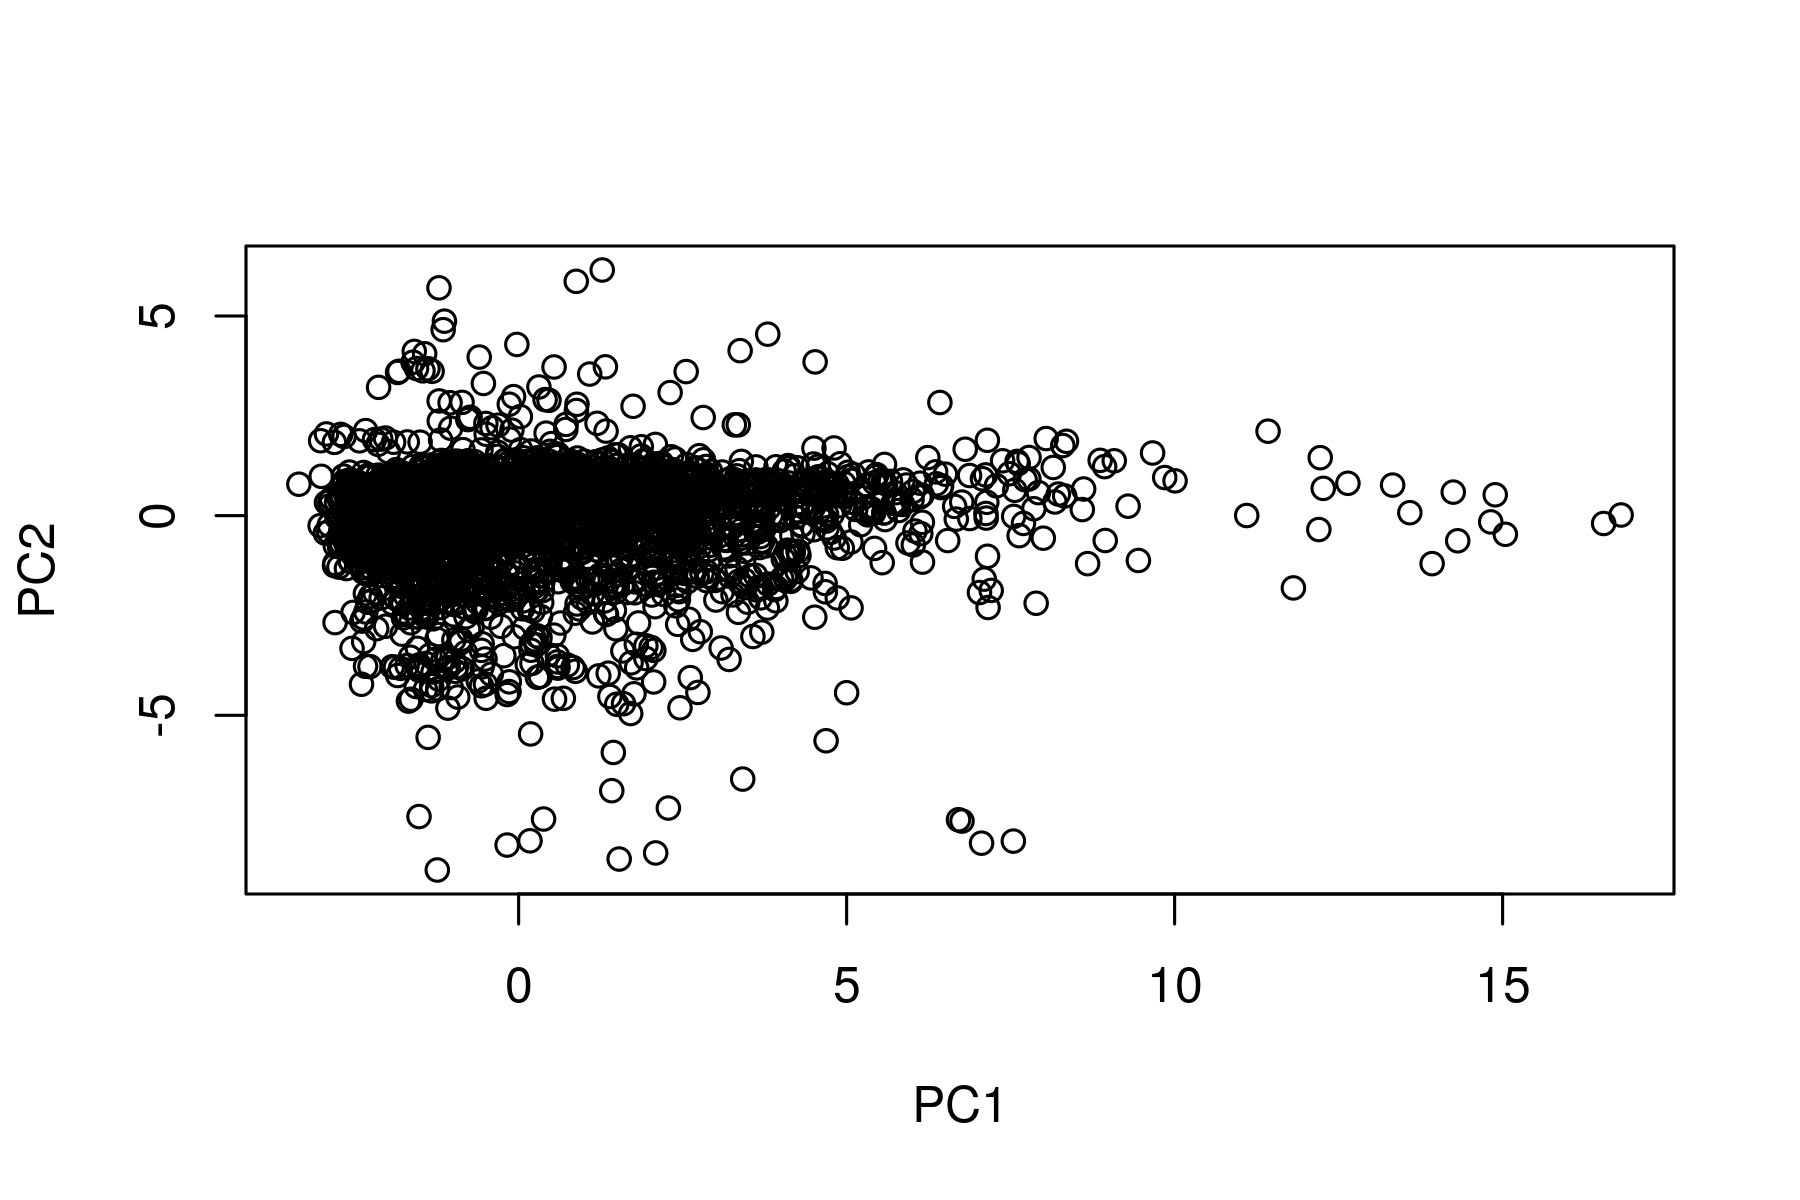

In [37]:
prdfmadrid <- prcomp(df_madrid[,cols] |> na.omit() ,center = TRUE, scale. = TRUE)
prdfmadrid

plot(prdfmadrid$x[,1:2])

In [38]:
# Simulamos 1 apartamento aleatorio
set.seed(873878)
df_madrid.sample <- data.frame('Accommodates' = rnorm(1, 
                                                    mean=mean(df_madrid$Accommodates, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Accommodates, na.rm=TRUE)),
                             'Bathrooms'= rnorm(1, 
                                                    mean=mean(df_madrid$Bathrooms, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Bathrooms, na.rm=TRUE)),
                             'Bedrooms'= rnorm(1, 
                                                    mean=mean(df_madrid$Bedrooms, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Bedrooms, na.rm=TRUE)),
                             'Beds'= rnorm(1, 
                                                    mean=mean(df_madrid$Beds, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Beds, na.rm=TRUE)),
                             'Price'= rnorm(1, 
                                                    mean=mean(df_madrid$Price, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Price, na.rm=TRUE)),
                             'Guests.Included'= rnorm(1, 
                                                    mean=mean(df_madrid$Guests.Included, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Guests.Included, na.rm=TRUE)),
                             'Extra.People'= rnorm(1, 
                                                    mean=mean(df_madrid$Extra.People, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Extra.People, na.rm=TRUE)),
                             'Review.Scores.Rating'= rnorm(1, 
                                                    mean=mean(df_madrid$Review.Scores.Rating, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Review.Scores.Rating, na.rm=TRUE)),
                             'Latitude'= rnorm(1, 
                                                    mean=mean(df_madrid$Latitude, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Latitude, na.rm=TRUE)),
                             'Longitude'= rnorm(1, 
                                                    mean=mean(df_madrid$Longitude, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Longitude, na.rm=TRUE)),
                             'Square.Meters'= rnorm(1, 
                                                    mean=mean(df_madrid$Square.Meters, na.rm=TRUE), 
                                                    sd=sd(df_madrid$Square.Meters, na.rm=TRUE)))
df_madrid.sample

Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.877882,1.494008,2.198804,2.710047,99.10737,2.194158,14.8765,84.89381,40.4274,-3.705935,67.35923


In [39]:
library(ggplot2)
sample_pci_plot <- function (df, df_apartamento) {
    # Definimos las columnas que nos interesa
    cols = c('Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 
             'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 
             'Latitude', 'Longitude', 'Square.Meters')
    # Calculamos con prcomp
    prdf <- prcomp(df[,cols] |> na.omit() ,center = TRUE, scale. = TRUE)
    # Plot de PC1 y PC2
    g = ggplot(data=data.frame(prdf$x), aes(x=PC1, y=PC2)) + geom_point()
    g = g + geom_point()
    # PCA de los Apartamentos
    df_apartamento_pca <- predict(prdf, newdata = df_apartamento)
    # Plot de los apartamentos
    g = g + geom_point(aes(x = df_apartamento_pca[1,1],
                           y = df_apartamento_pca[1,2],
                           color='red'))
    g
}

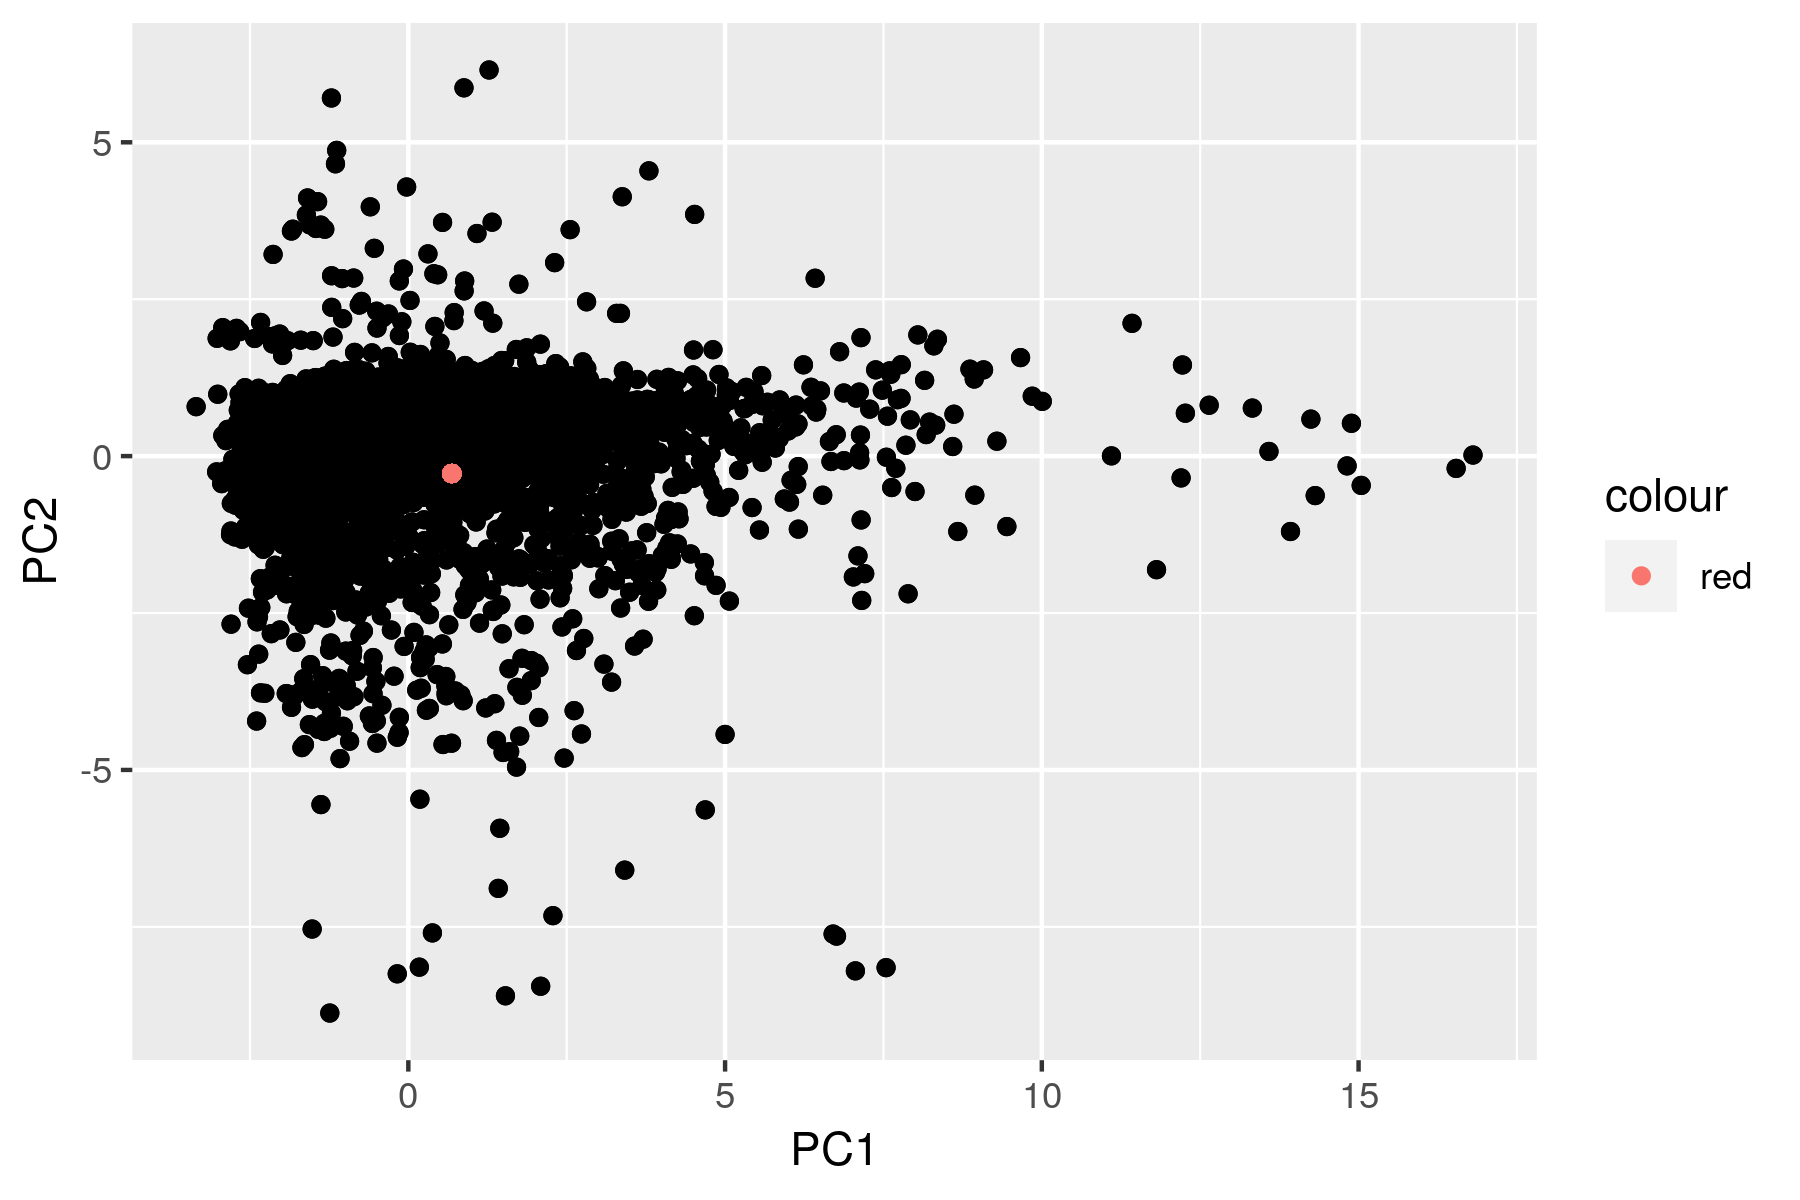

In [40]:
sample_pci_plot(df_madrid, df_madrid.sample)

In [41]:
m = data.frame(p1 = c(1,2,3,4,5), p2 = c(2,3,4,3,1))
nrow(m)


[1] 5

In [42]:
habitaciones_mas_similares <- function (df, df_apartamento) {
    # Definimos las columnas que nos interesa
    cols = c('Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 
             'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 
             'Latitude', 'Longitude', 'Square.Meters')
    # Calculamos con prcomp
    prdf <- prcomp(df[,cols] |> na.omit() ,center = TRUE, scale. = TRUE)
    df_pca <- data.frame(prdf$x)
    # PCA del apartamento
    df_apartamento_pca <- data.frame(predict(prdf, newdata = df_apartamento))
    # calculo de distancia (con 3 PCX es suficiente, más añadiría ruido y complejidad solamente)
    d <- dist(rbind(df_apartamento_pca, df_pca), method="euclidean")[1:nrow(df_pca)]
    # Los 5 con distancia mínima
    d_mins <- order(d)[1:5]
    id <- rownames(df_pca[d %in% d[d_mins], ])
    print(df_pca[id,])
    print(df_apartamento_pca)
    return(df[rownames(df) %in% id, ])
}

In [43]:
habitaciones_mas_similares(df_madrid, df_madrid.sample)

           PC1         PC2         PC3        PC4         PC5        PC6
355  0.6887116  0.14497822 -0.03839803 -0.1243434 -1.35288302 0.81101980
2941 0.6963654 -0.16774903  0.40718052  0.5337789 -0.88647669 0.13997241
4130 0.4162077 -1.10799185  0.11516278 -1.1079369 -1.21797528 0.77012073
4787 0.1271001 -0.36293808  0.61271949 -0.7484439 -0.01848468 0.02435867
6429 0.6145847 -0.04845979  0.57172539  0.2449336 -0.27750972 0.44112736
            PC7        PC8        PC9       PC10        PC11
355  -0.2683445  0.4854646 -0.6724631 0.02230789  0.25182266
2941 -0.2946042  0.3316073 -0.6154774 0.02564954 -0.03393002
4130 -0.1147852  0.4531745 -0.6486614 0.06892189 -0.02351113
4787 -0.5288211 -0.3551568 -0.4227515 0.37074831 -0.02396978
6429  0.2814127  0.6519000 -0.6663626 0.10966837 -0.02216850
        PC1        PC2       PC3        PC4        PC5       PC6        PC7
1 0.6868618 -0.2774158 0.2751667 -0.6649506 -0.7742596 0.3812862 -0.1803958
        PC8        PC9      PC10       PC11


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
355,Argüelles,4,1.5,2,2,95,1044,2,15,89,40.42920,-3.717775,96.99073,1
2941,Malasaña,4,1.5,2,2,95,NA,2,20,94,40.42609,-3.703987,86.73691,1
4130,Arapiles,4,1.5,2,2,90,NA,2,11,80,40.43807,-3.704734,78.10474,1
4787,Justicia,4,1.0,2,3,85,NA,2,15,85,40.42339,-3.696755,57.99701,1
6429,Malasaña,4,1.5,2,2,75,NA,3,15,93,40.42459,-3.703862,76.30488,1


In [44]:
print("Parece que a pesar de ser apartamentos parecidos, hay diferencia significativa en metros cuadrados, 
        podría darse mas prioridad quitando variables que puedan ser menos significativas en PCA")

[1] "Parece que a pesar de ser apartamentos parecidos, hay diferencia significativa en metros cuadrados, \n        podría darse mas prioridad quitando variables que puedan ser menos significativas en PCA"


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?

Warning message:
“Removed 703 rows containing missing values (geom_point).”


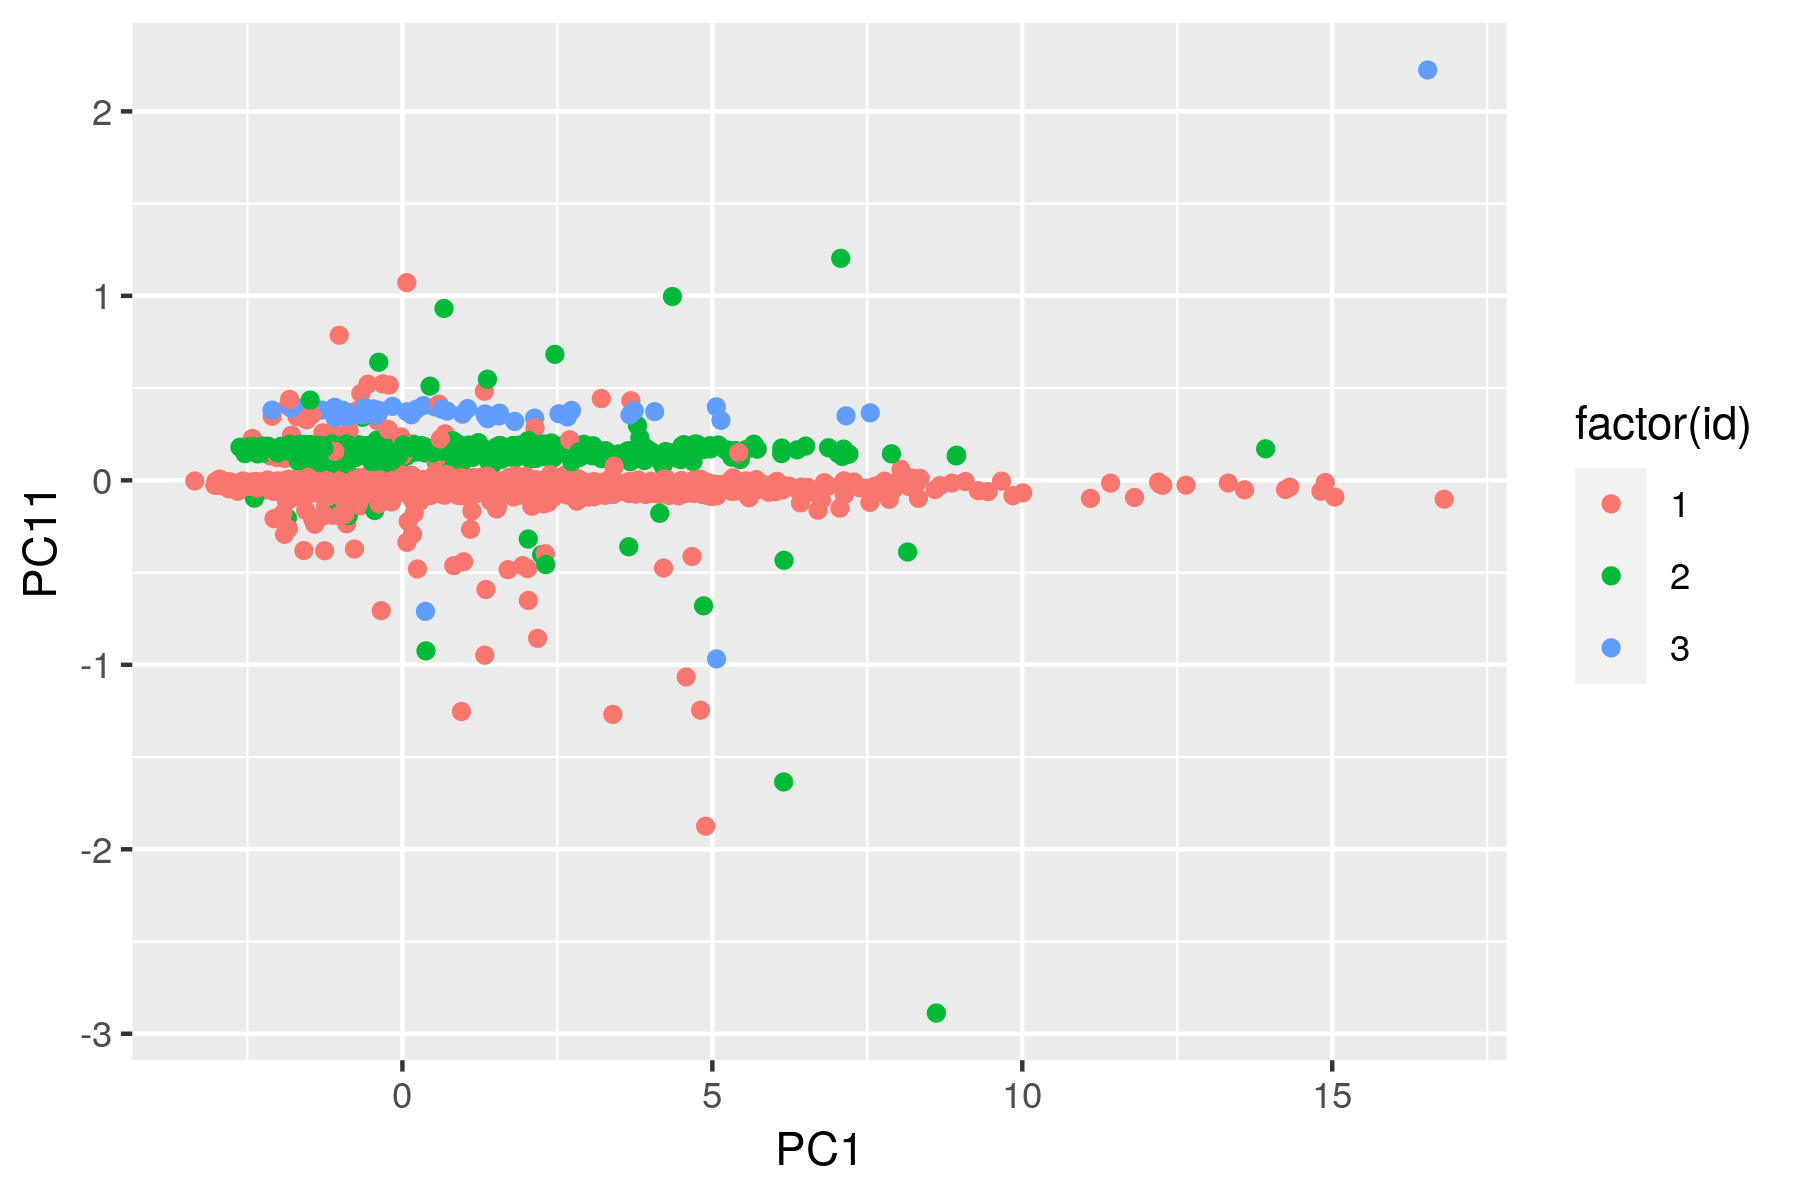

In [45]:
cols = c('Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 
             'Guests.Included', 'Extra.People', 'Review.Scores.Rating', 
             'Latitude', 'Longitude', 'Square.Meters')
prdf <- data.frame(prcomp(df_madrid[,cols] |> na.omit() ,center = TRUE, scale. = TRUE)$x)
prdf$id = 0
id1 = rownames(df_madrid[df_madrid$neighb_id == 1, ])
prdf[id1, ]$id = 1
id2 = rownames(df_madrid[df_madrid$neighb_id == 2, ])
prdf[id2, ]$id = 2
id3 = rownames(df_madrid[df_madrid$neighb_id == 3, ])
prdf[id3, ]$id = 3

g = ggplot(data=data.frame(prdf), aes(x=PC1, y=PC11, color=factor(id)))
g = g + geom_point()
g

In [46]:
print('Podemos comprobar que la que mejor clasifica el id de barrio es PC11, esto es debido a que tiene una alta coorrelación')

[1] "Podemos comprobar que la que mejor clasifica el id de barrio es PC11, \n        imagino que al no considerarla en la fórmula principal, esta aparece en la última como ruido,\n        si se incluyera al realizar PCA está aparecería en algún PCX mas bajo"
